__Name: Peng Liu, Hao Xu__

In [2]:
import pandas as pd
%load_ext rpy2.ipython
%R library(ggplot2)
%R library(scales)

array(['scales', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], dtype='<U9')

<font size=4>__table 1: yearly data of median earning by gender__</font>

In [3]:
#collect yearly eanring ratio from table1
year = pd.read_excel('YearlyFemaleMaleEarningRatio.xlsx', header=[0,1,2,3]).iloc[:,[0,11,15,17]]
year.columns = ['year','male','female','ratio']

In [4]:
year['year'] = year['year'].astype('str').str[:4].astype('int')
year = year.groupby('year').mean().reset_index()#deal with repeated year data
year.loc[(year.year == 1960)|(year.year == 2017),'label'] = year.ratio.round(2)

In [5]:
#collect median earning in 2017 from table1
figure1 = year.iloc[[57]].T.reset_index()
figure1.columns = ['gender','MedianEarnings']
figure1 = figure1.iloc[[1,2],:]
figure1['label'] = figure1['MedianEarnings'].round(-2)/1000
figure1.label = figure1.label.astype('str')+'k'

<font size=4>__figure 1: 2017 earning median by gender__</font>

In [6]:
%R -i figure1

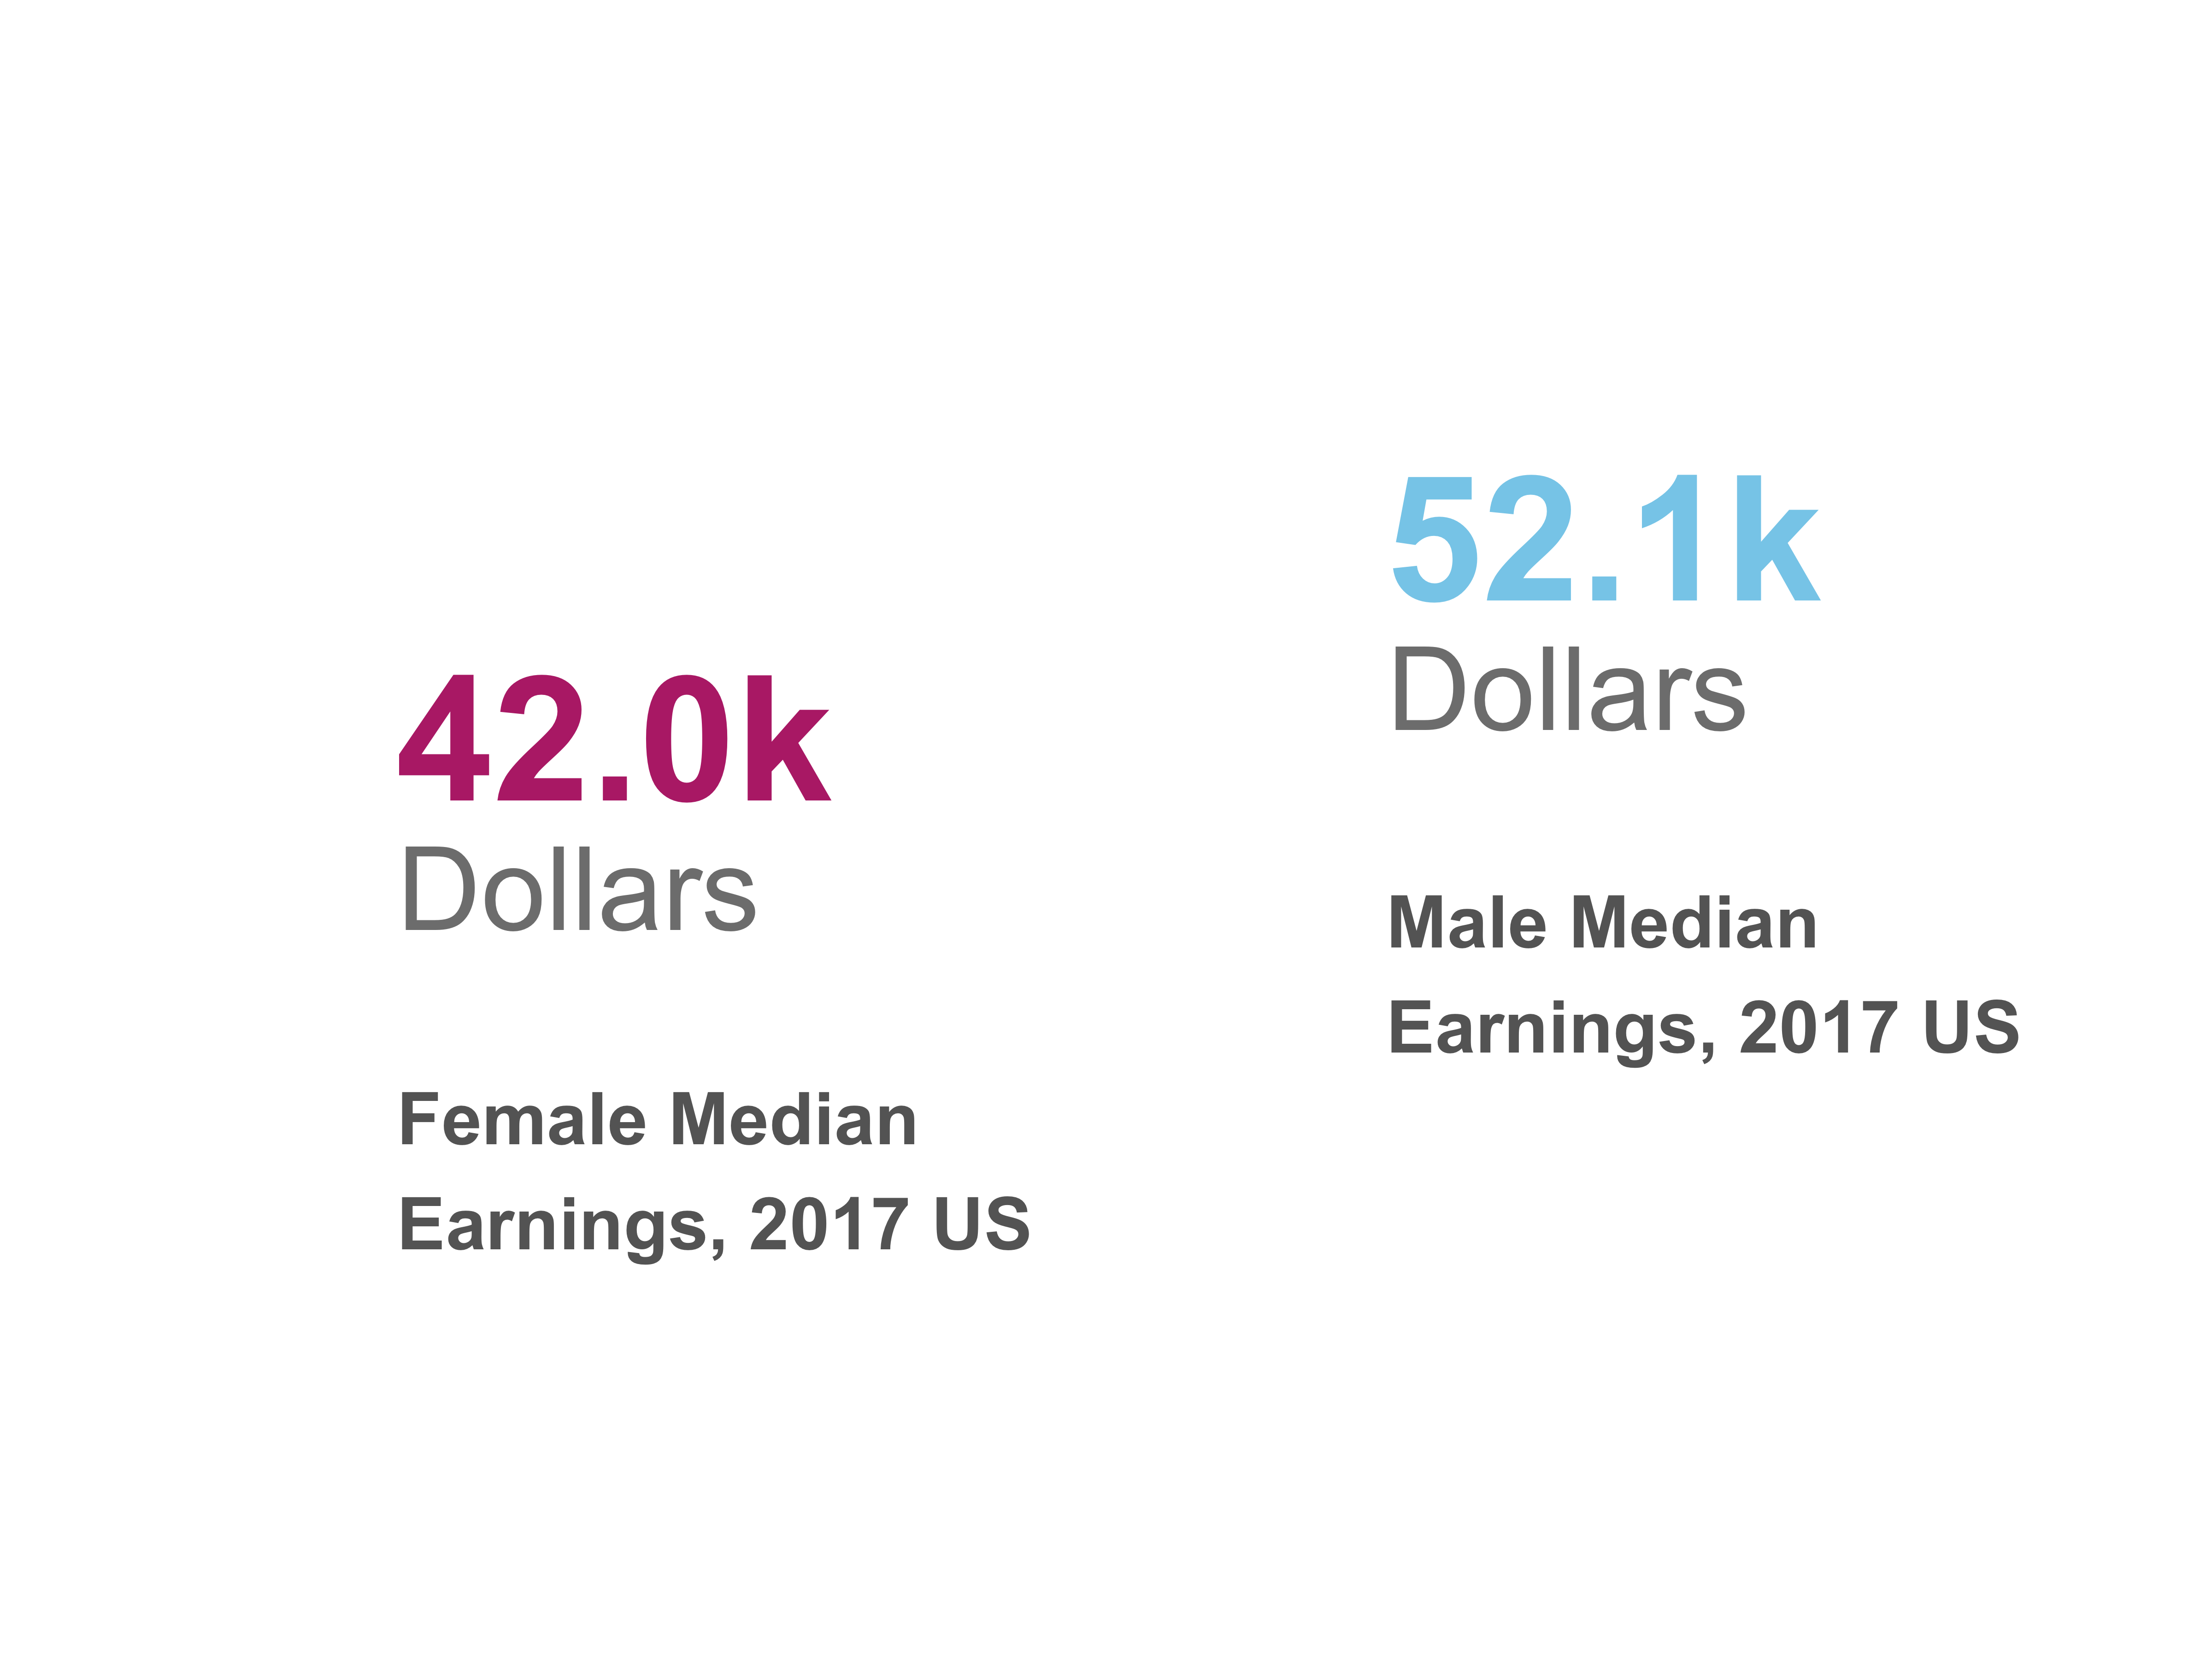

In [7]:
%%R -w 12 -h 9 --units in -r 400
ggplot() +
    geom_text(aes(x = gender, y = MedianEarnings, label = 'Dollars'), data = figure1, 
              size = 16, vjust = 2.3, hjust = 0.6, color = 'grey50')+
    geom_text(aes(x = gender, y = MedianEarnings, label = label, color = gender), data = figure1, 
              size = 24, fontface = 'bold')+
    scale_color_manual(values = c('#B92F77', 'skyblue'))+
    scale_y_continuous(limits = c(0,75000),label = dollar,breaks = seq(0,75000, by = 15000))+
    annotate(geom = "text", x = 0.78, y = 20000, label = 'Female Median\nEarnings, 2017 US',
             hjust = 0, size = 10, color = 'grey40',family="Helvetica-Narrow")+
    annotate(geom = "text", x = 1.78, y = 30000, label = 'Male Median\nEarnings, 2017 US',
             hjust = 0, size = 10, color = 'grey40',family="Helvetica-Narrow")+
    ylab('\nMedian Earnings\n')+
    theme_minimal()+
    theme(panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.title = element_blank(),
          axis.text = element_blank(),
          legend.position = 'none')

#ggsave('figure1.png',units = 'in', width = 12, height = 9)

<font size=4>__figure 2: Yearly Median Earning by Gender from 1960 to 2017__</font>

In [8]:
%R -i year

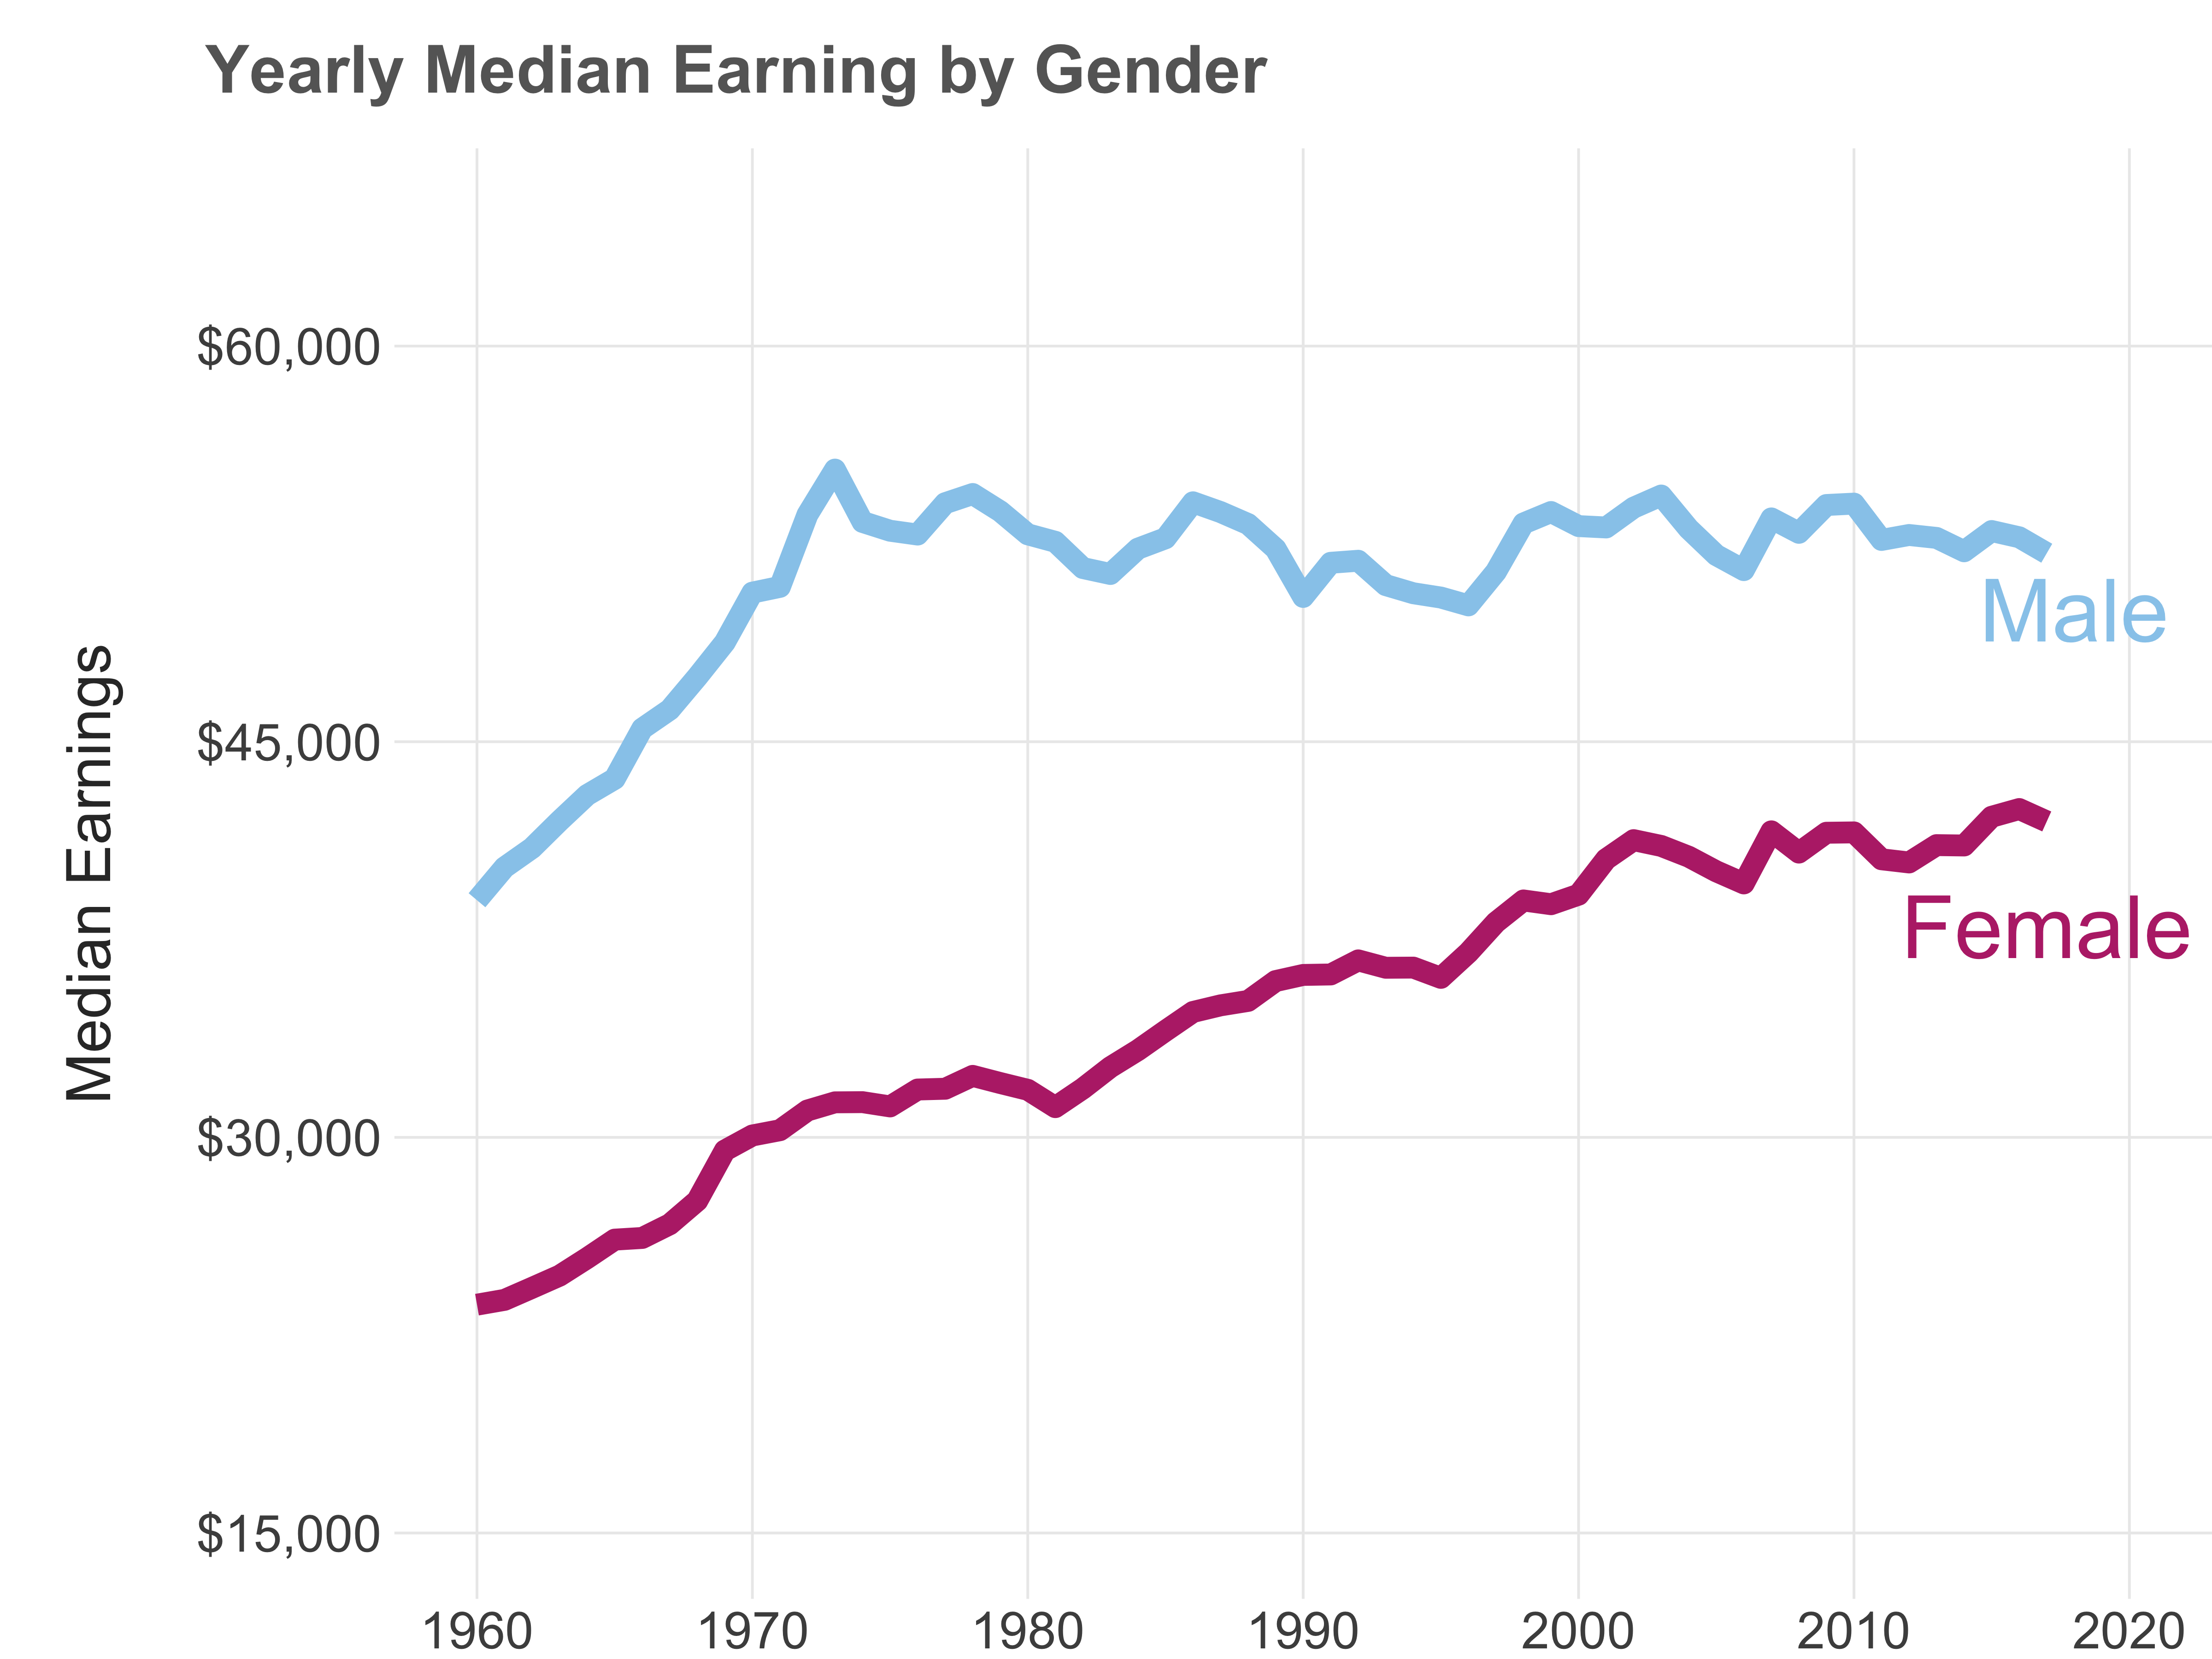

In [9]:
%%R -w 12 -h 9 --units in -r 400
ggplot() +
    geom_line(aes(x = year, y = male), data = year, color = '#97CBEC', size = 4) +
    geom_text(aes(x = 2018, y = 50000, label = 'Male'), color = '#97CBEC', size = 12) +
    geom_line(aes(x = year, y = female), data = year, color = '#B92F77', size = 4) +
    geom_text(aes(x = 2017, y = 38000, label = 'Female'), color = '#B92F77', size = 12) +
    scale_x_continuous(limits = c(1960,2020), breaks = seq(1960,2020,by = 10))+
    scale_y_continuous(limits = c(15000,65000),label = dollar,breaks = seq(15000,65000, by = 15000))+
    ggtitle('Yearly Median Earning by Gender')+
    ylab('\nMedian Earnings\n')+
    theme_minimal()+
    theme(axis.title.x = element_blank(),
          axis.title.y = element_text(size = 24, color = 'grey20'),
          axis.text = element_text(size = 20),
          panel.grid.minor = element_blank(),
          legend.position = 'none',
          plot.margin = unit(c(1,0,0,0),'cm'),
          plot.title = element_text(size =26,face="bold", color = 'grey40', vjust = 3, hjust = -.25))
#ggsave('figure2.png',units = 'in', width = 12, height = 9)

### <font size=4>__figure 3: Yearly Female Male Earning Ratio from 1960 to 2017__</font>

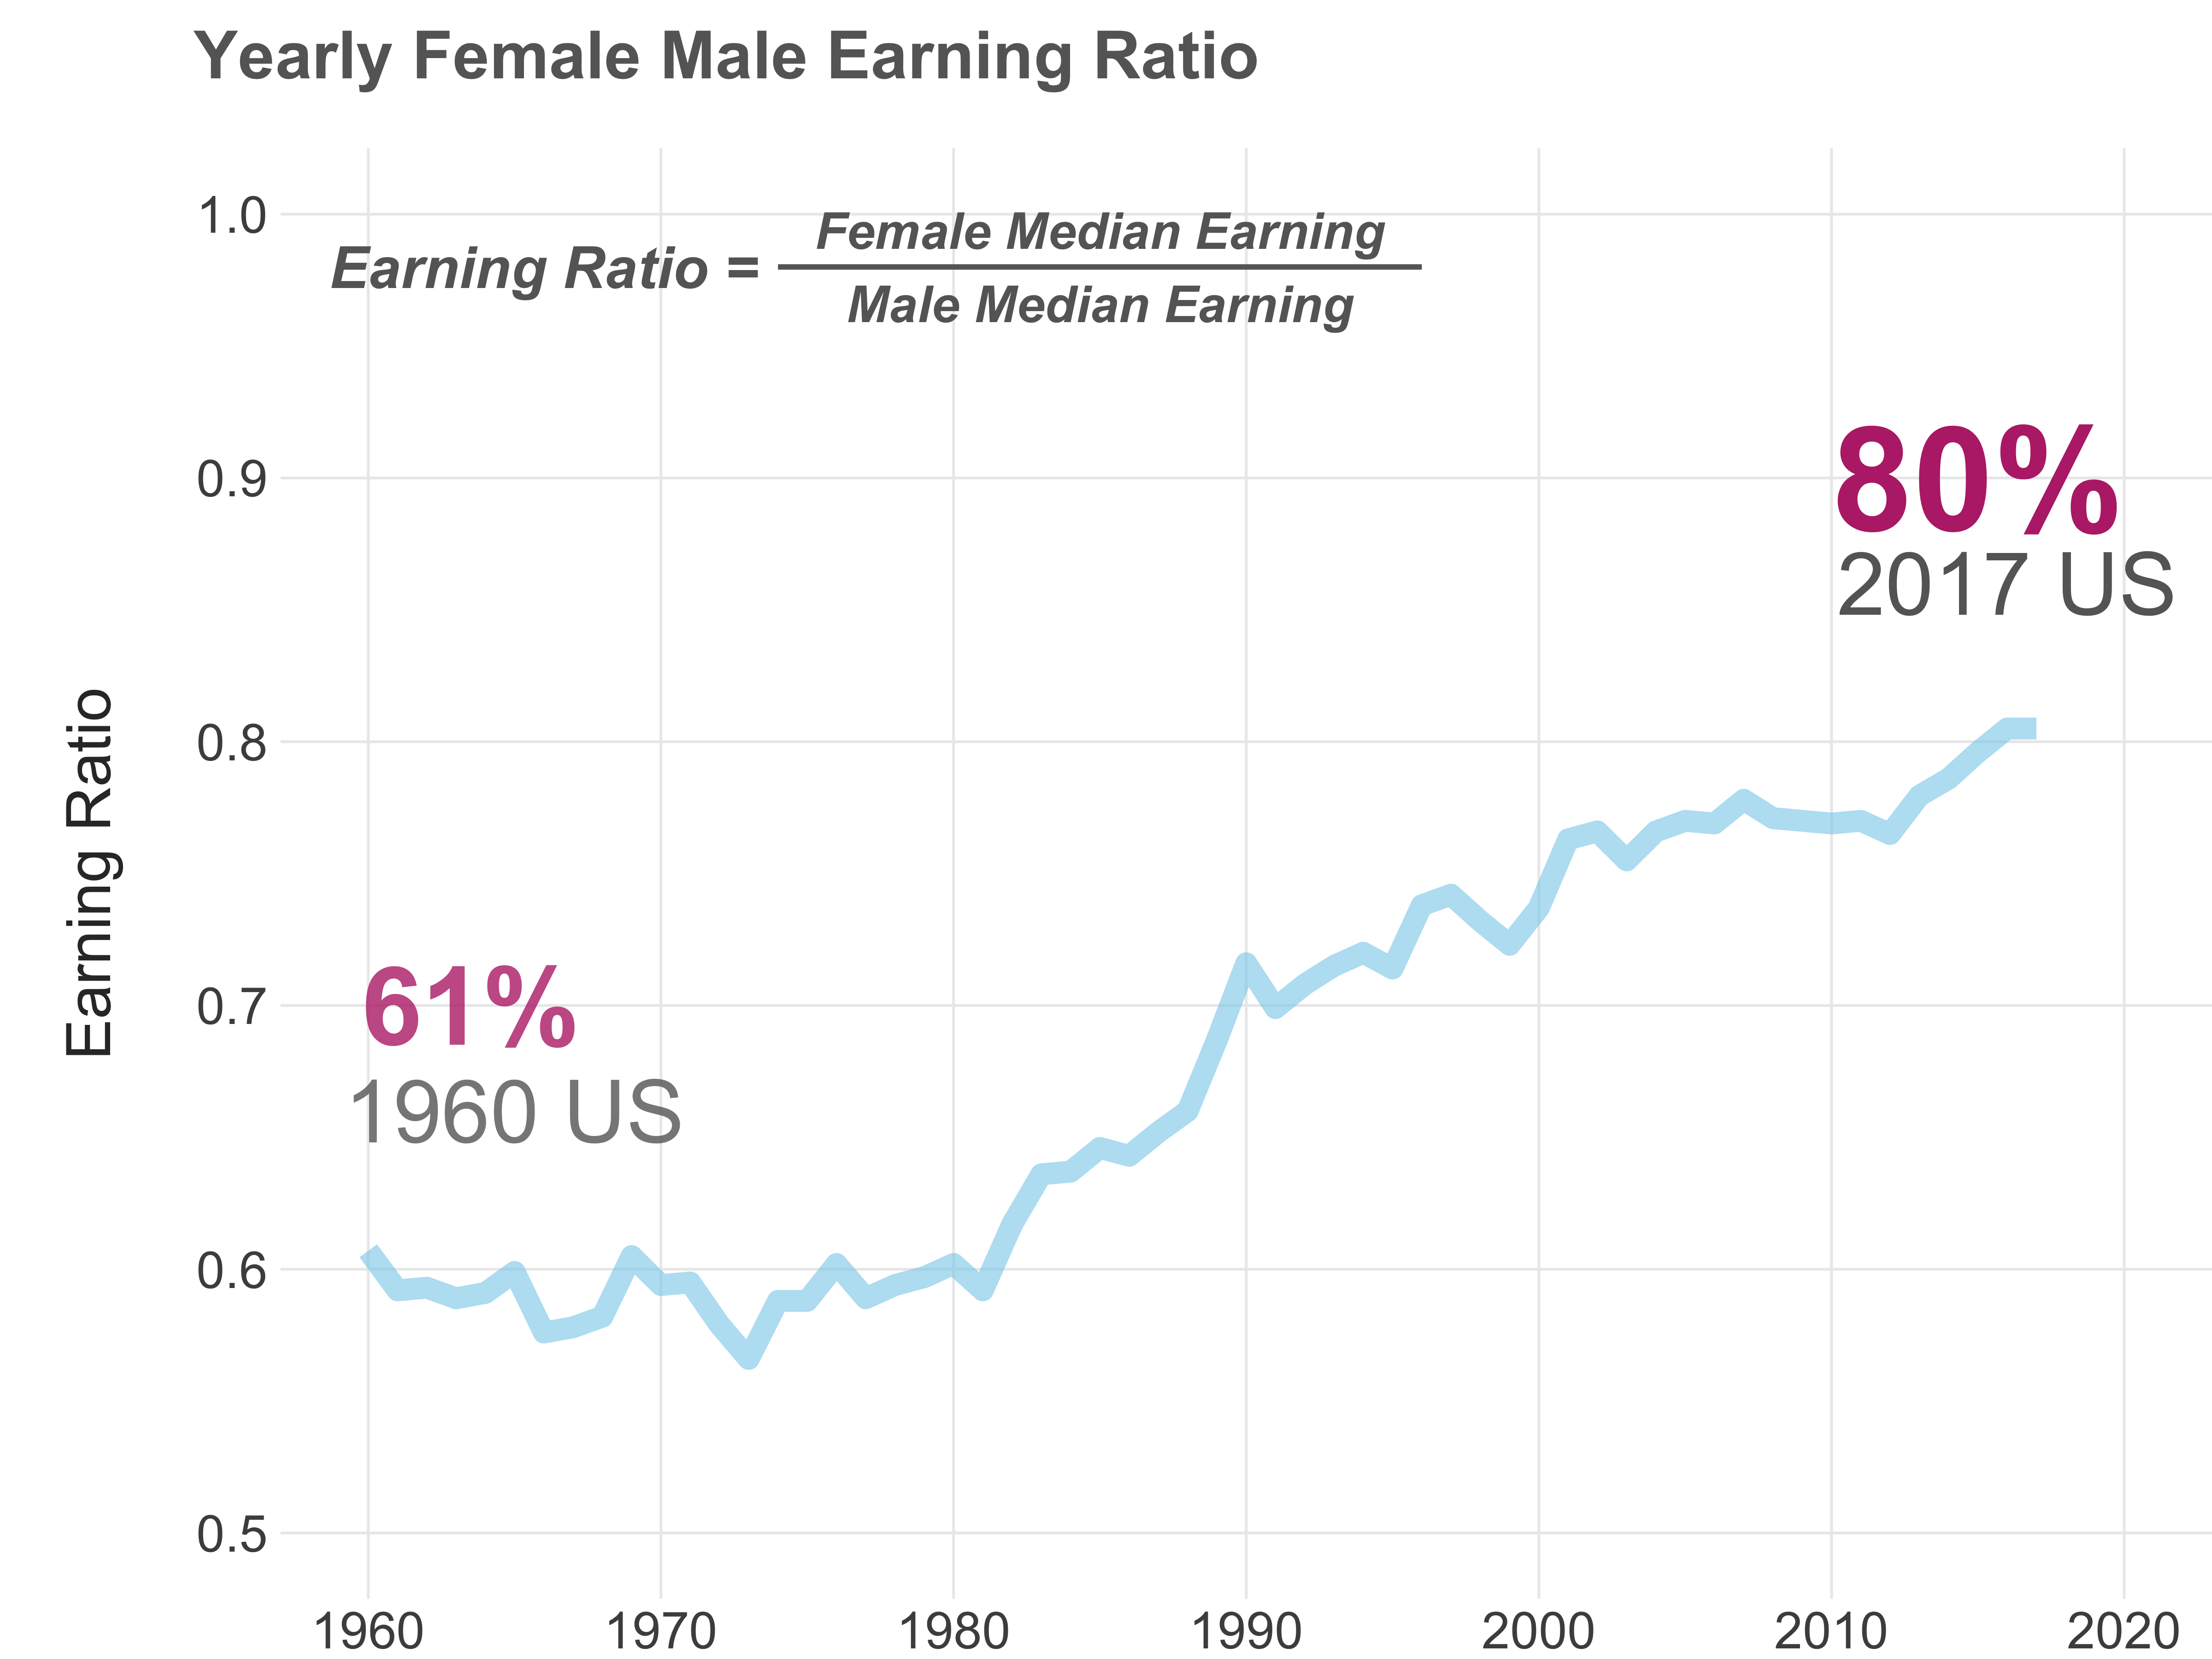

In [10]:
%%R -w 12 -h 9 --units in -r 400
ggplot() +
    geom_line(aes(x = year, y = ratio), data = year, color = 'skyblue', size = 4, alpha=0.6) +
    #geom_text(aes(x = year, y = ratio, label = label), data = year, color = 'dodgerblue', size = 12, vjust = -0.5)+
    scale_x_continuous(limits = c(1960,2020), breaks = seq(1960,2020,by = 10))+
    scale_y_continuous(limits = c(0.5,1))+
    annotate(geom = 'text', x = 1963.5 , y = 0.7, label = '61%', fontface = 'bold', size = 15, color = '#B92F77', alpha = 0.8)+
    annotate(geom = 'text', x = 2015 , y = 0.9, label = '80%', fontface = 'bold', size = 20, color = '#B92F77')+
    annotate(geom = 'text', x = 1965 , y = 0.66, label = '1960 US', size = 12, color = 'grey40', alpha = 0.8)+
    annotate(geom = 'text', x = 2016 , y = 0.86, label = '2017 US', size = 12, color = 'grey40')+
    annotate(geom = 'text', x = 1966, y = 0.98, label = 'Earning Ratio =', 
             size = 8, color = 'grey40', fontface = 'bold.italic')+
    annotate(geom = 'text', x = 1985, y = 0.98, label = 'Female Median Earning\nMale Median Earning', 
             size = 7, color = 'grey40', fontface = 'bold.italic')+
    geom_segment(aes(x = 1974, xend = 1996, y = 0.98, yend = 0.98), size = 1, color= 'grey40')+
    ylab('\nEarning Ratio\n')+
    ggtitle('Yearly Female Male Earning Ratio')+
    theme_minimal()+
    theme(panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_text(size = 24, color = 'grey20'),
          axis.text = element_text(size = 20),
          legend.position = 'none',
          plot.margin = unit(c(1,0,0,0),'cm'),
          plot.title = element_text(size =26,face="bold", color = 'grey40', vjust = 4, hjust = -.1))
#ggsave('figure3.png',units = 'in', width = 12, height = 9)

<font size=4>__table 2 earning_sex_occupation_fulltime__</font>

In [11]:
df = pd.read_excel('earning_sex_occupation_fulltime.xls',header = [0,1,2],thousands=',')
df = df.dropna(axis=1)
t = 'Subject', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'
df[t] = df[t].astype('category')
df = df.set_index(t)

In [12]:
#Define a function to collect data for each location
def extractdf(location,df):
    l = []
    for i in df:
        if ((i[0] == location)&(i[2] == 'Estimate')):
            l.append(i)
        if (type(df[i][0]) == str):
            if('%' in df[i][0]):
                df[i] = df[i].str.rstrip('%').astype('float') / 100.0
    df = df[l].reset_index()
    df.columns = ['Occupation','MedianTotal','MedianMale','MedianFemale','Ratio']
    df.Ratio = df.Ratio.round(2)
    df['Region'] = location.split(',')[0]
    return(df)

In [13]:
us = extractdf('United States',df)
ca = extractdf('California',df)
sf = extractdf('San Francisco County, California',df)
sm = extractdf('San Mateo County, California',df)
sc = extractdf('Santa Clara County, California',df)

In [14]:
#concat the dataset for each location into a long dataframe
table2 = pd.concat([us,ca,sf,sm,sc],axis = 0).reset_index(drop=True)
table2.Occupation = table2.Occupation.astype('str')
#table2

In [15]:
#Select Occupations for overall and tech industry:
less_occupation = table2.loc[(table2.Occupation.str[-1]==':')].reset_index(drop=True)
total = table2.loc[(table2.Occupation=='Full-time, year-round civilian employed population 16 years and over with earnings')|(table2.Occupation=='Computer, engineering, and science occupations:  ')].sort_values(['Occupation','Ratio'],ascending = [True,False]).reset_index(drop=True)
Ratio = total.loc[total.Region != 'United States'].reset_index(drop=True)
Ratio['flag'] = 'below'
Ratio.loc[Ratio.Ratio>0.8,'flag'] = 'above'
Ratio.Region = pd.Categorical(Ratio.Region,categories=list(Ratio.Region.unique()), ordered = True)
#total

In [16]:
#Select Occupations for tech industry:
less_occupation.Occupation = less_occupation.Occupation.str.replace('occupations:','').str.strip()
Ratio_tech = less_occupation.loc[less_occupation.Occupation == 'Computer, engineering, and science']
Ratio_tech['diff'] = Ratio_tech.Ratio-0.8
Ratio_tech['flag'] = 'below'
Ratio_tech.loc[Ratio_tech.Ratio>0.8,'flag'] = 'above'
Ratio_tech = Ratio_tech.loc[Ratio_tech.Region != 'United States'].reset_index(drop=True)
Ratio['diff'] = Ratio.Ratio-0.8
TechFull = pd.concat([Ratio,Ratio_tech])
#TechFull

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

<font size=4>__figure 4-1: Ratio vs Region for tech industry__</font>

In [17]:
%R -i TechFull

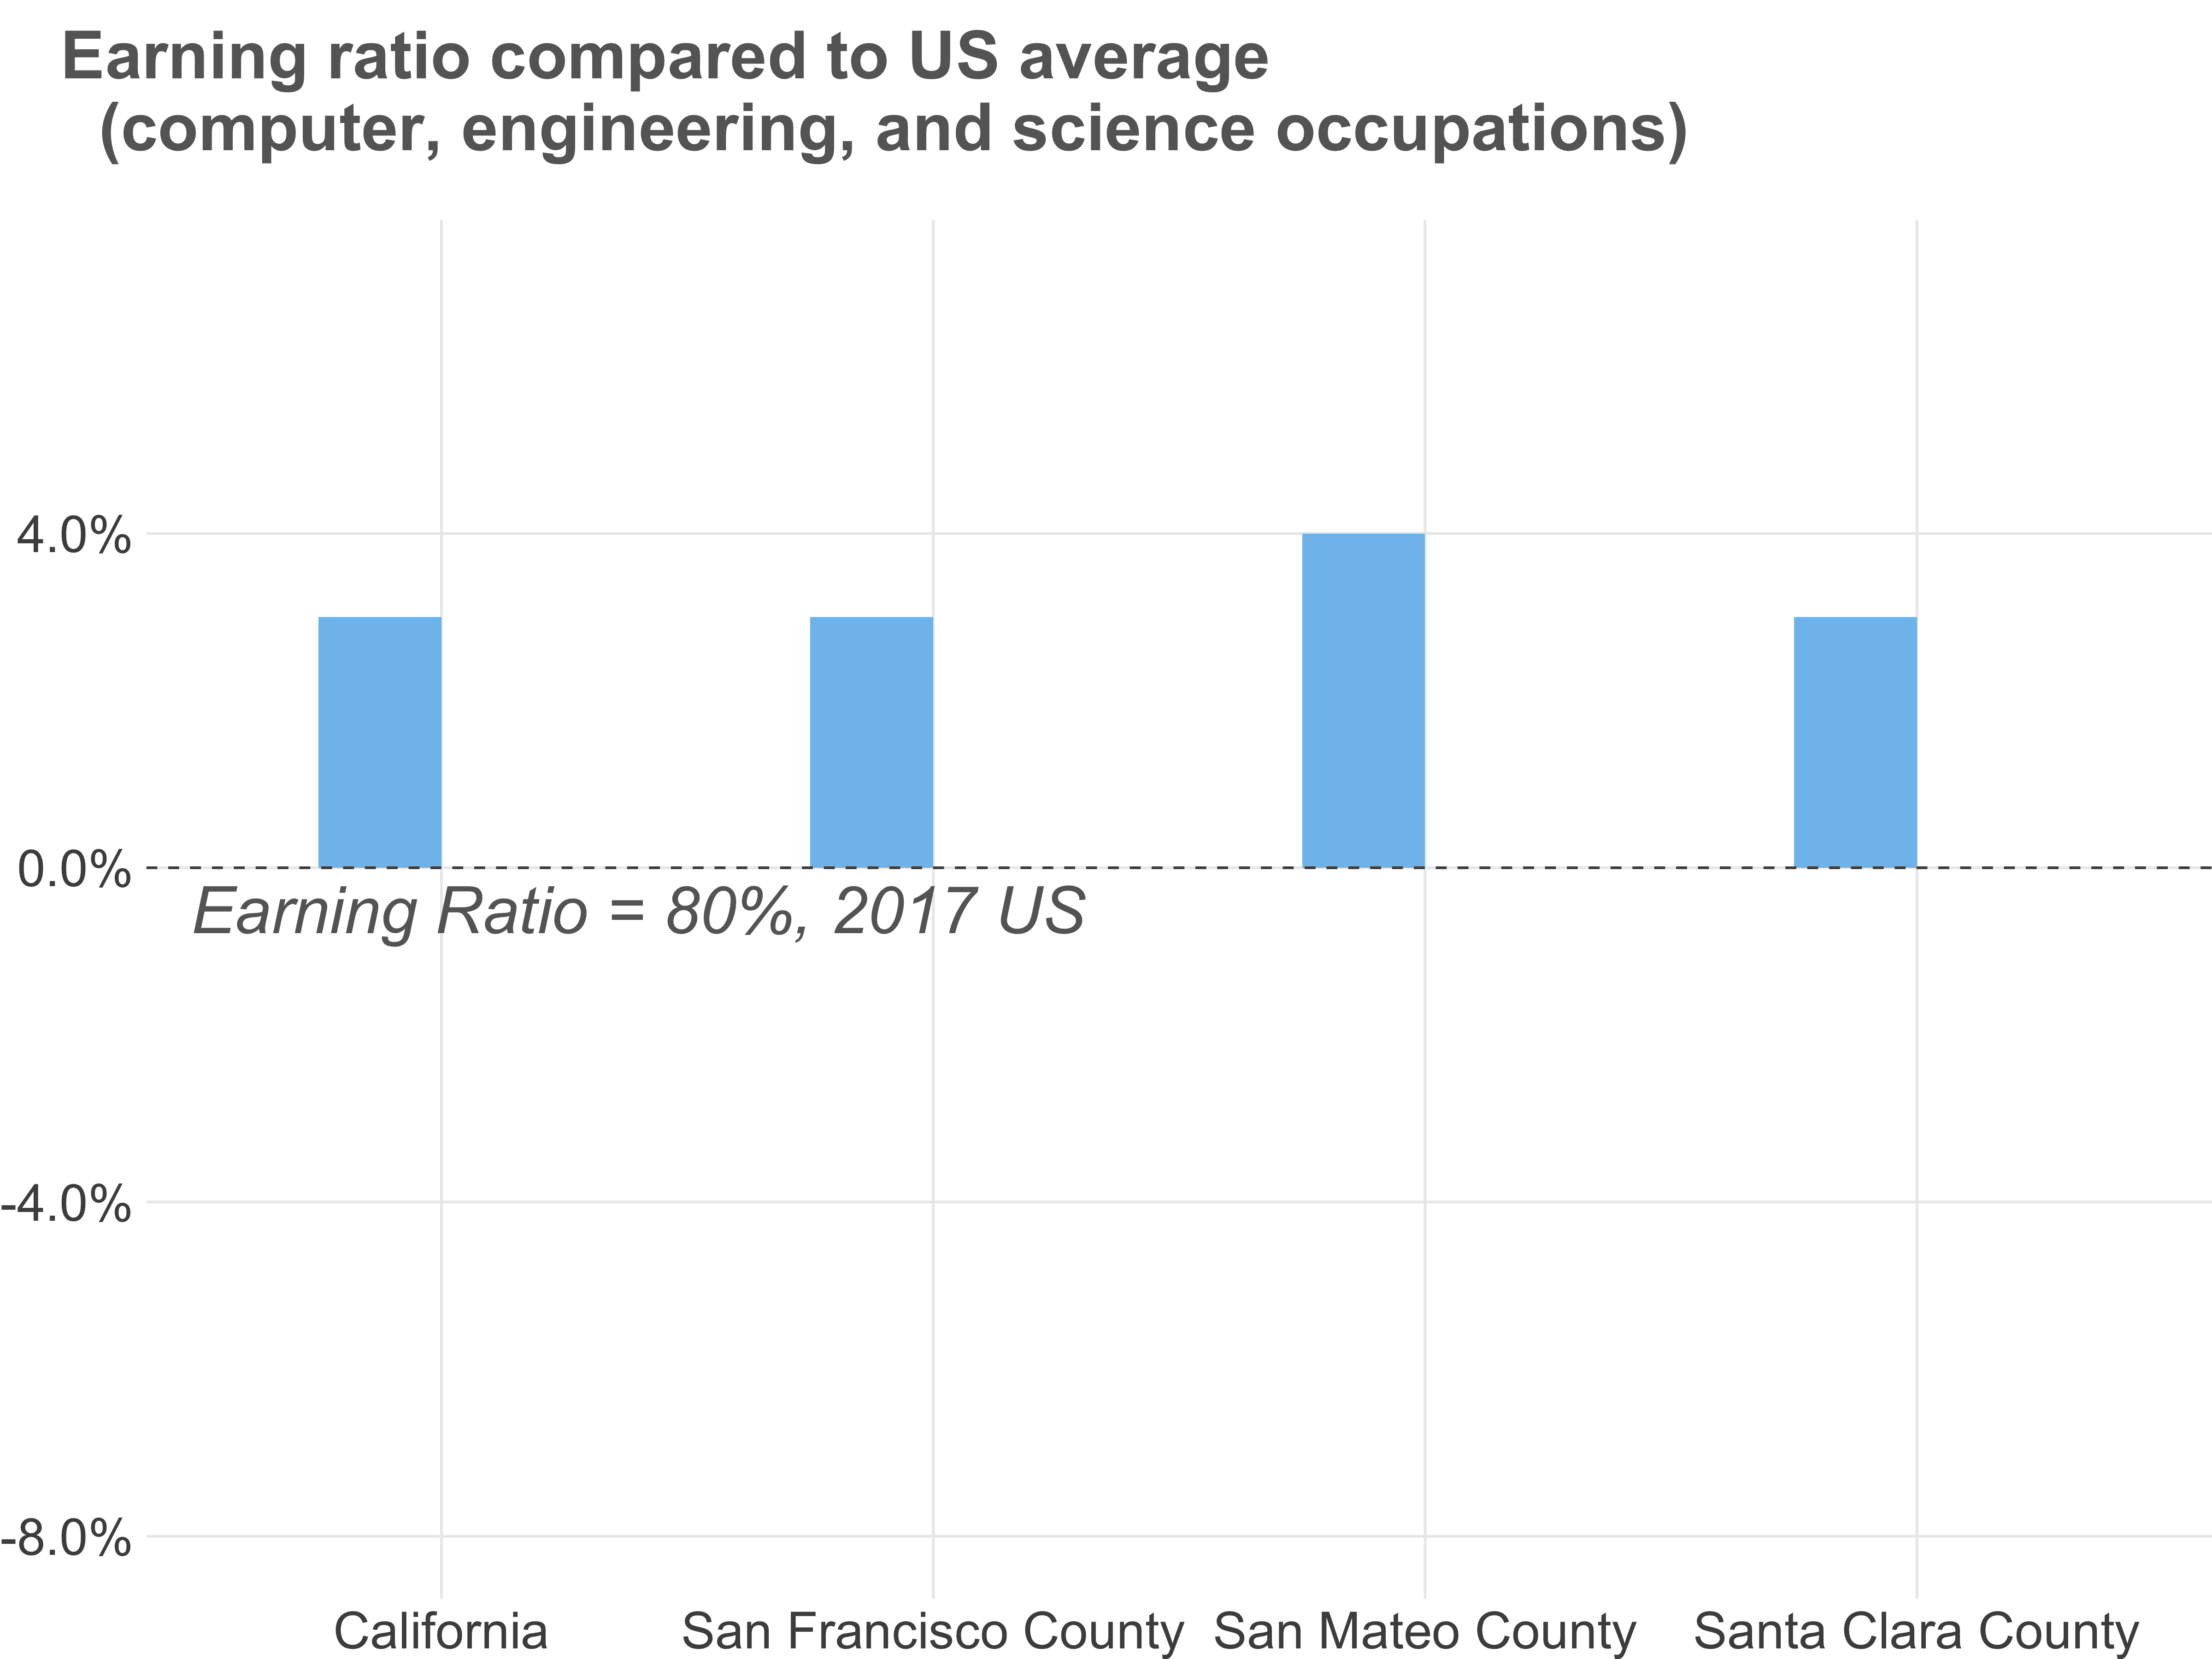

In [18]:
%%R -w 12 -h 9 --units in -r 400
ggplot() +
    geom_bar(aes(x = Region, y = diff,alpha = Occupation, fill = Occupation), data = TechFull, width = 0.5,
             stat= 'identity', position = position_dodge(width=0.5))+
    geom_hline(yintercept=0.0, linetype = 'dashed', color = 'grey30')+
    scale_y_continuous(label = percent)+
    annotate(geom = 'text',x = 1.4, y = -0.005, label = 'Earning Ratio = 80%, 2017 US',
            size = 9, color = 'grey40', fontface = 'italic')+
    scale_fill_manual(values = c('skyblue2', 'white'))+
    scale_alpha_manual(values = c(1,0))+
    ggtitle('Earning ratio compared to US average\n(computer, engineering, and science occupations)')+
    theme_minimal()+
    theme(panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text = element_text(size = 20),
          legend.position = 'none',
          plot.margin = unit(c(1,0,0,0),'cm'),
          plot.title = element_text(size =26,face="bold", color = 'grey40', vjust = 4, hjust = -.1))
#ggsave('figure4-1.png',units = 'in', width = 12, height = 9)

<font size=4>__figure 4-2: Ratio vs Region for all industries__</font>

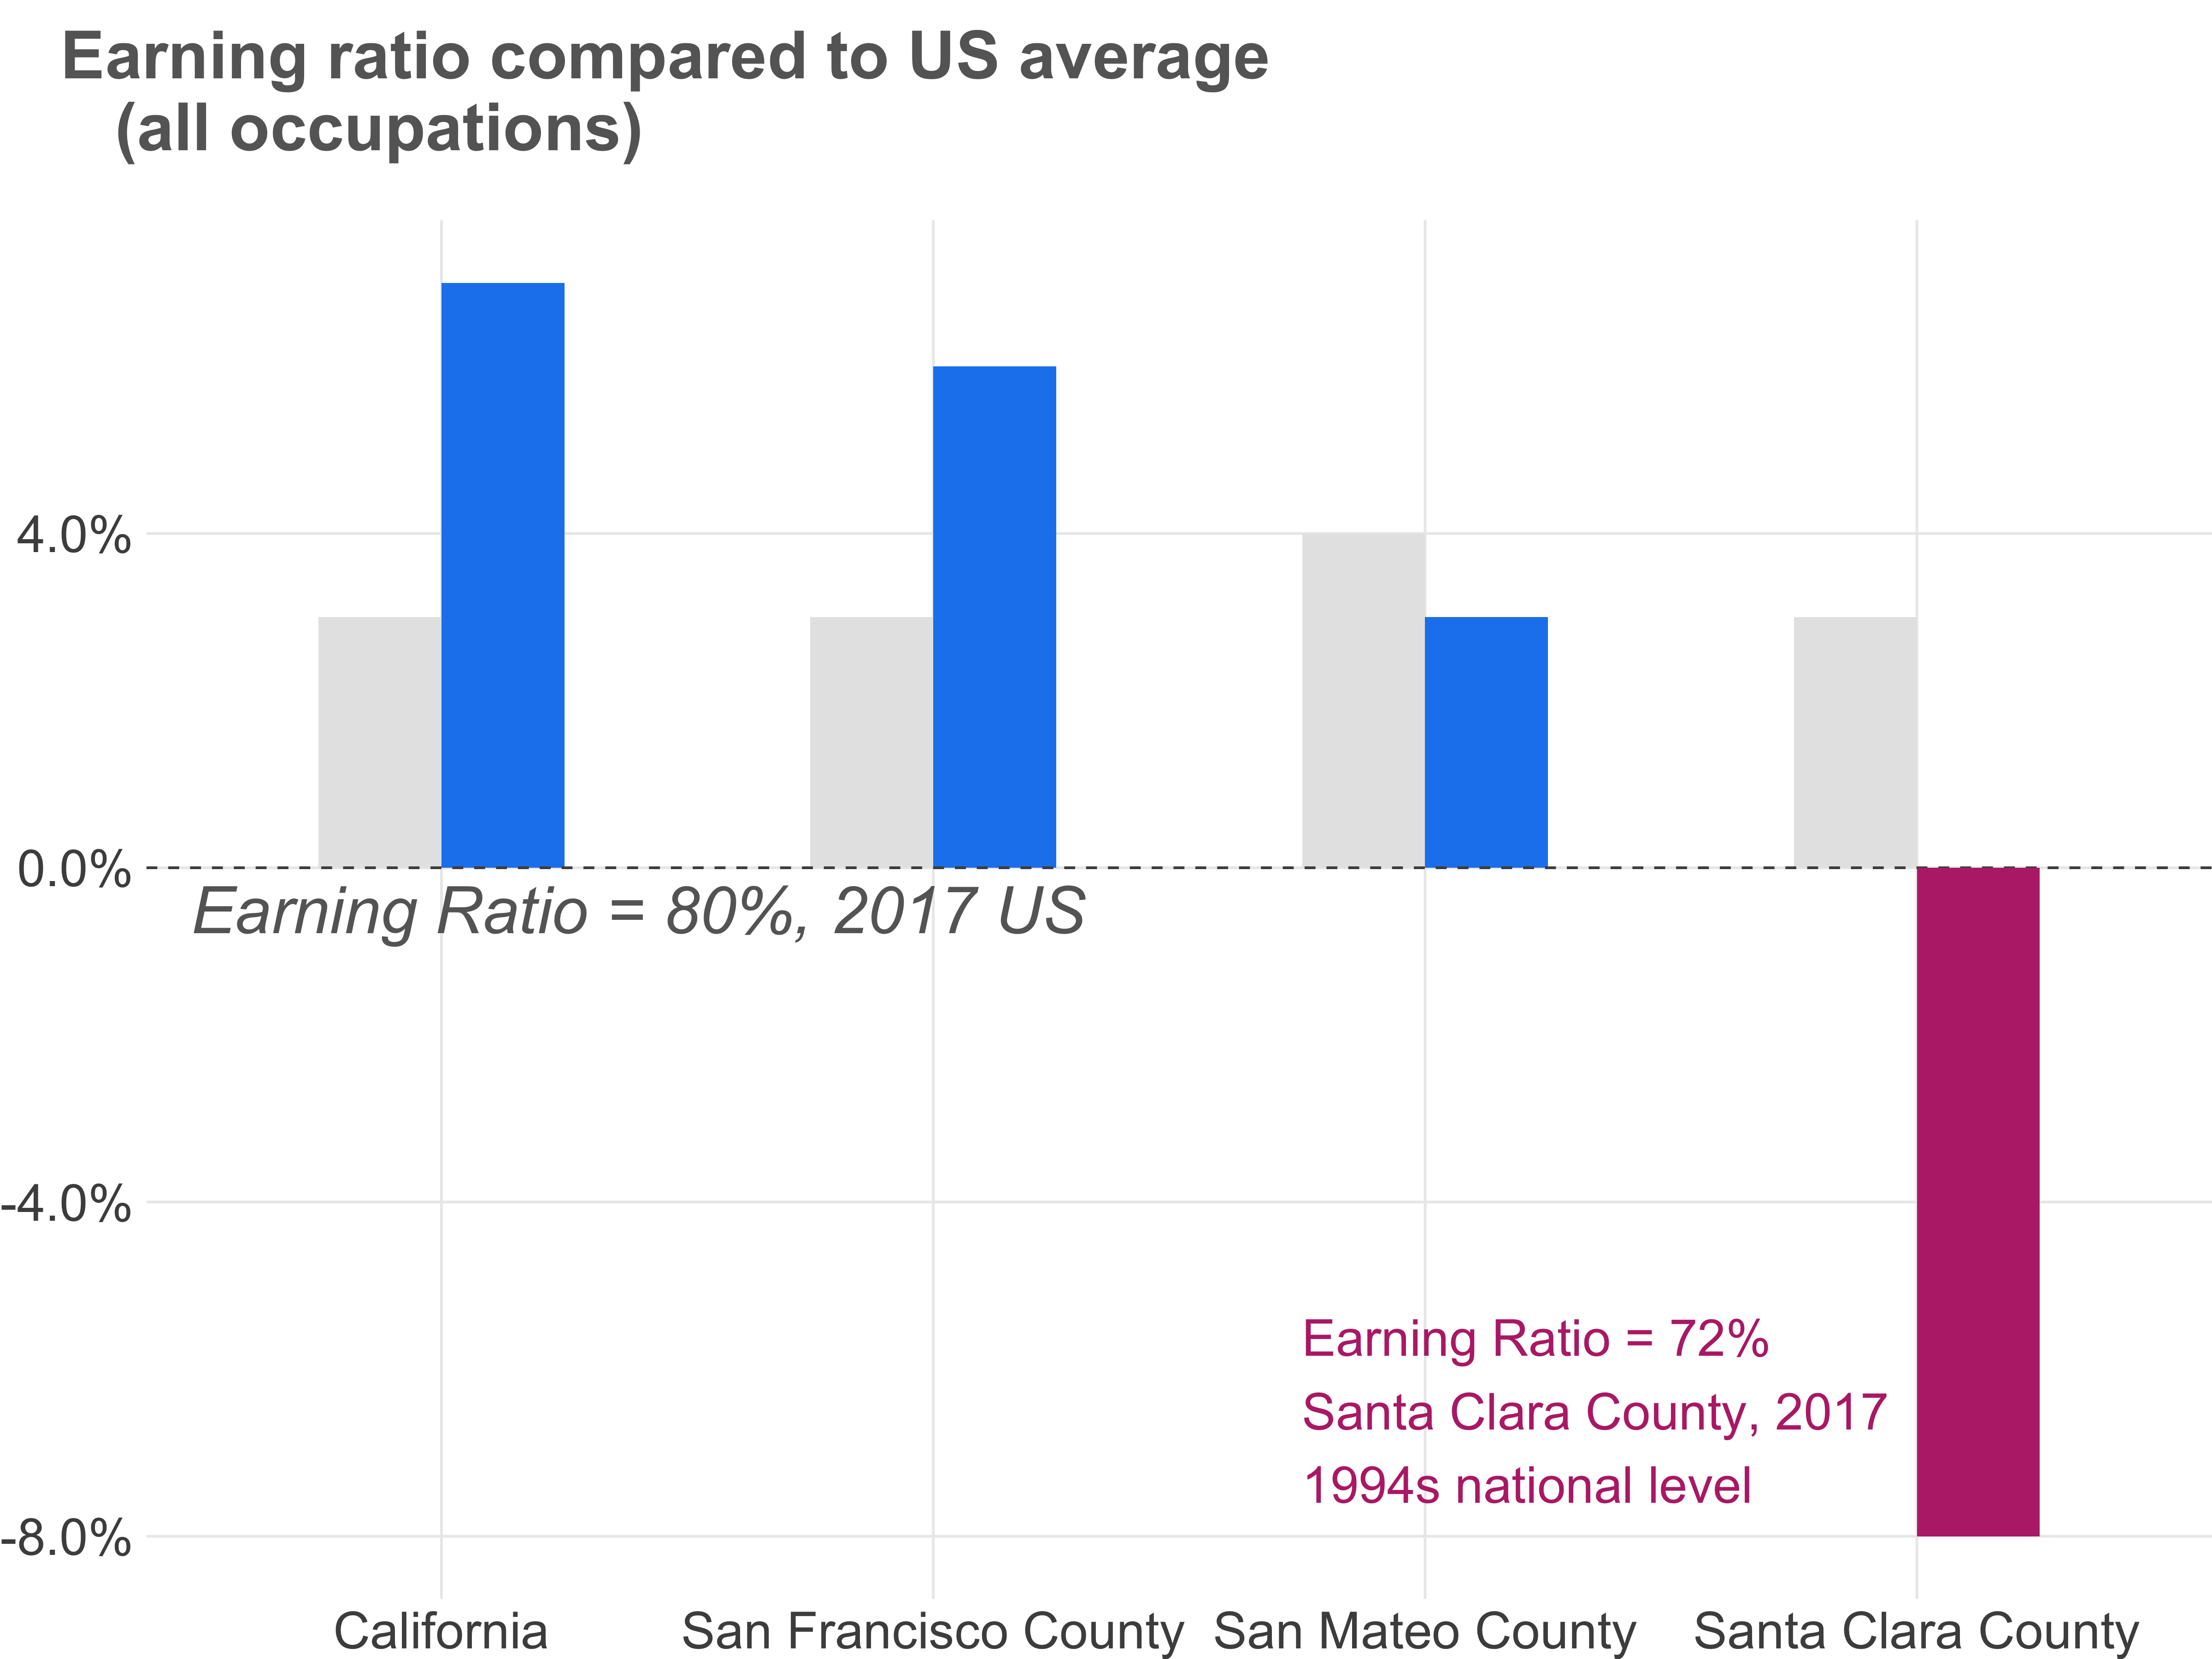

In [34]:
%%R -w 12 -h 9 --units in -r 400
ggplot() +
    #geom_segment(aes(x = Region, xend = Region, y = diff, yend = 0), data = Ratio_tech,color = 'grey30')+
    geom_bar(aes(x = Region, y = diff,fill = Occupation), data = TechFull, width = 0.5,
             stat= 'identity', position = position_dodge(width=0.5))+

    geom_hline(yintercept=0.0, linetype = 'dashed', color = 'grey30')+
    scale_y_continuous(label = percent)+
    annotate(geom = 'text',x = 1.4, y = -0.005, label = 'Earning Ratio = 80%, 2017 US',
            size = 9, color = 'grey40', fontface = 'italic')+
    annotate(geom = 'rect', xmin = 4, xmax = 4.25, ymin = -0.08, ymax = 0, fill = '#B92F77')+
    scale_fill_manual(values = c('grey90', 'dodgerblue2'))+
    scale_alpha_manual(values = c(0,0.6))+
    annotate(geom = 'text',x = 2.75, y = -0.065, label = 'Earning Ratio = 72%\nSanta Clara County, 2017\n1994s national level',
            size = 7, color = '#B92F77',hjust=0)+
    ggtitle('Earning ratio compared to US average\n      (all occupations)')+
    theme_minimal()+
    theme(panel.grid.minor = element_blank(),
          axis.title.x = element_blank(),
          axis.title.y = element_blank(),
          axis.text = element_text(size = 20),
          legend.position = 'none',
          plot.margin = unit(c(1,0,0,0),'cm'),
          plot.title = element_text(size =26,face="bold", color = 'grey40', vjust = 4, hjust = -.1))
#ggsave('figure4-2.png',units = 'in', width = 12, height = 9)

<font size=4>__figure 5: Ratio vs Occupation in Santa Clara__</font>

In [23]:
#Select data for aggregated Occupations and region of Santa Clara County
SantaC = less_occupation.loc[less_occupation.Region == 'Santa Clara County'].reset_index(drop=True).drop(0).sort_values('MedianTotal', ascending = True).reset_index(drop=True)
SantaC.Occupation = ['Service',
 'Production, transportation,\nand material moving',
 'Natural resources,\nconstruction, and maintenance',
 'Sales and office',
 'Protective service',
 'Education, legal, community service,\narts, and media',
 'Healthcare practitioner\nand technical',
 'Management, business,\nand financial',
 'Computer, engineering, and science']
SantaC['flag'] = 'below'
SantaC.loc[SantaC.Ratio >0.72,'flag'] = 'above'
SantaC.Occupation = SantaC.Occupation.str.replace('occupations:','').str.strip()
SantaC['label'] = SantaC.Ratio*20000
SantaC['tech'] = 0
SantaC.loc[SantaC.Occupation == 'Computer, engineering, and science','tech']=1
SantaC.Occupation = pd.Categorical(SantaC.Occupation,categories=list(SantaC.Occupation.unique()), ordered = True)

SantaC_tech = SantaC.loc[SantaC.Occupation == 'Computer, engineering, and science']
#SantaC

In [24]:
%R -i SantaC
%R -i SantaC_tech

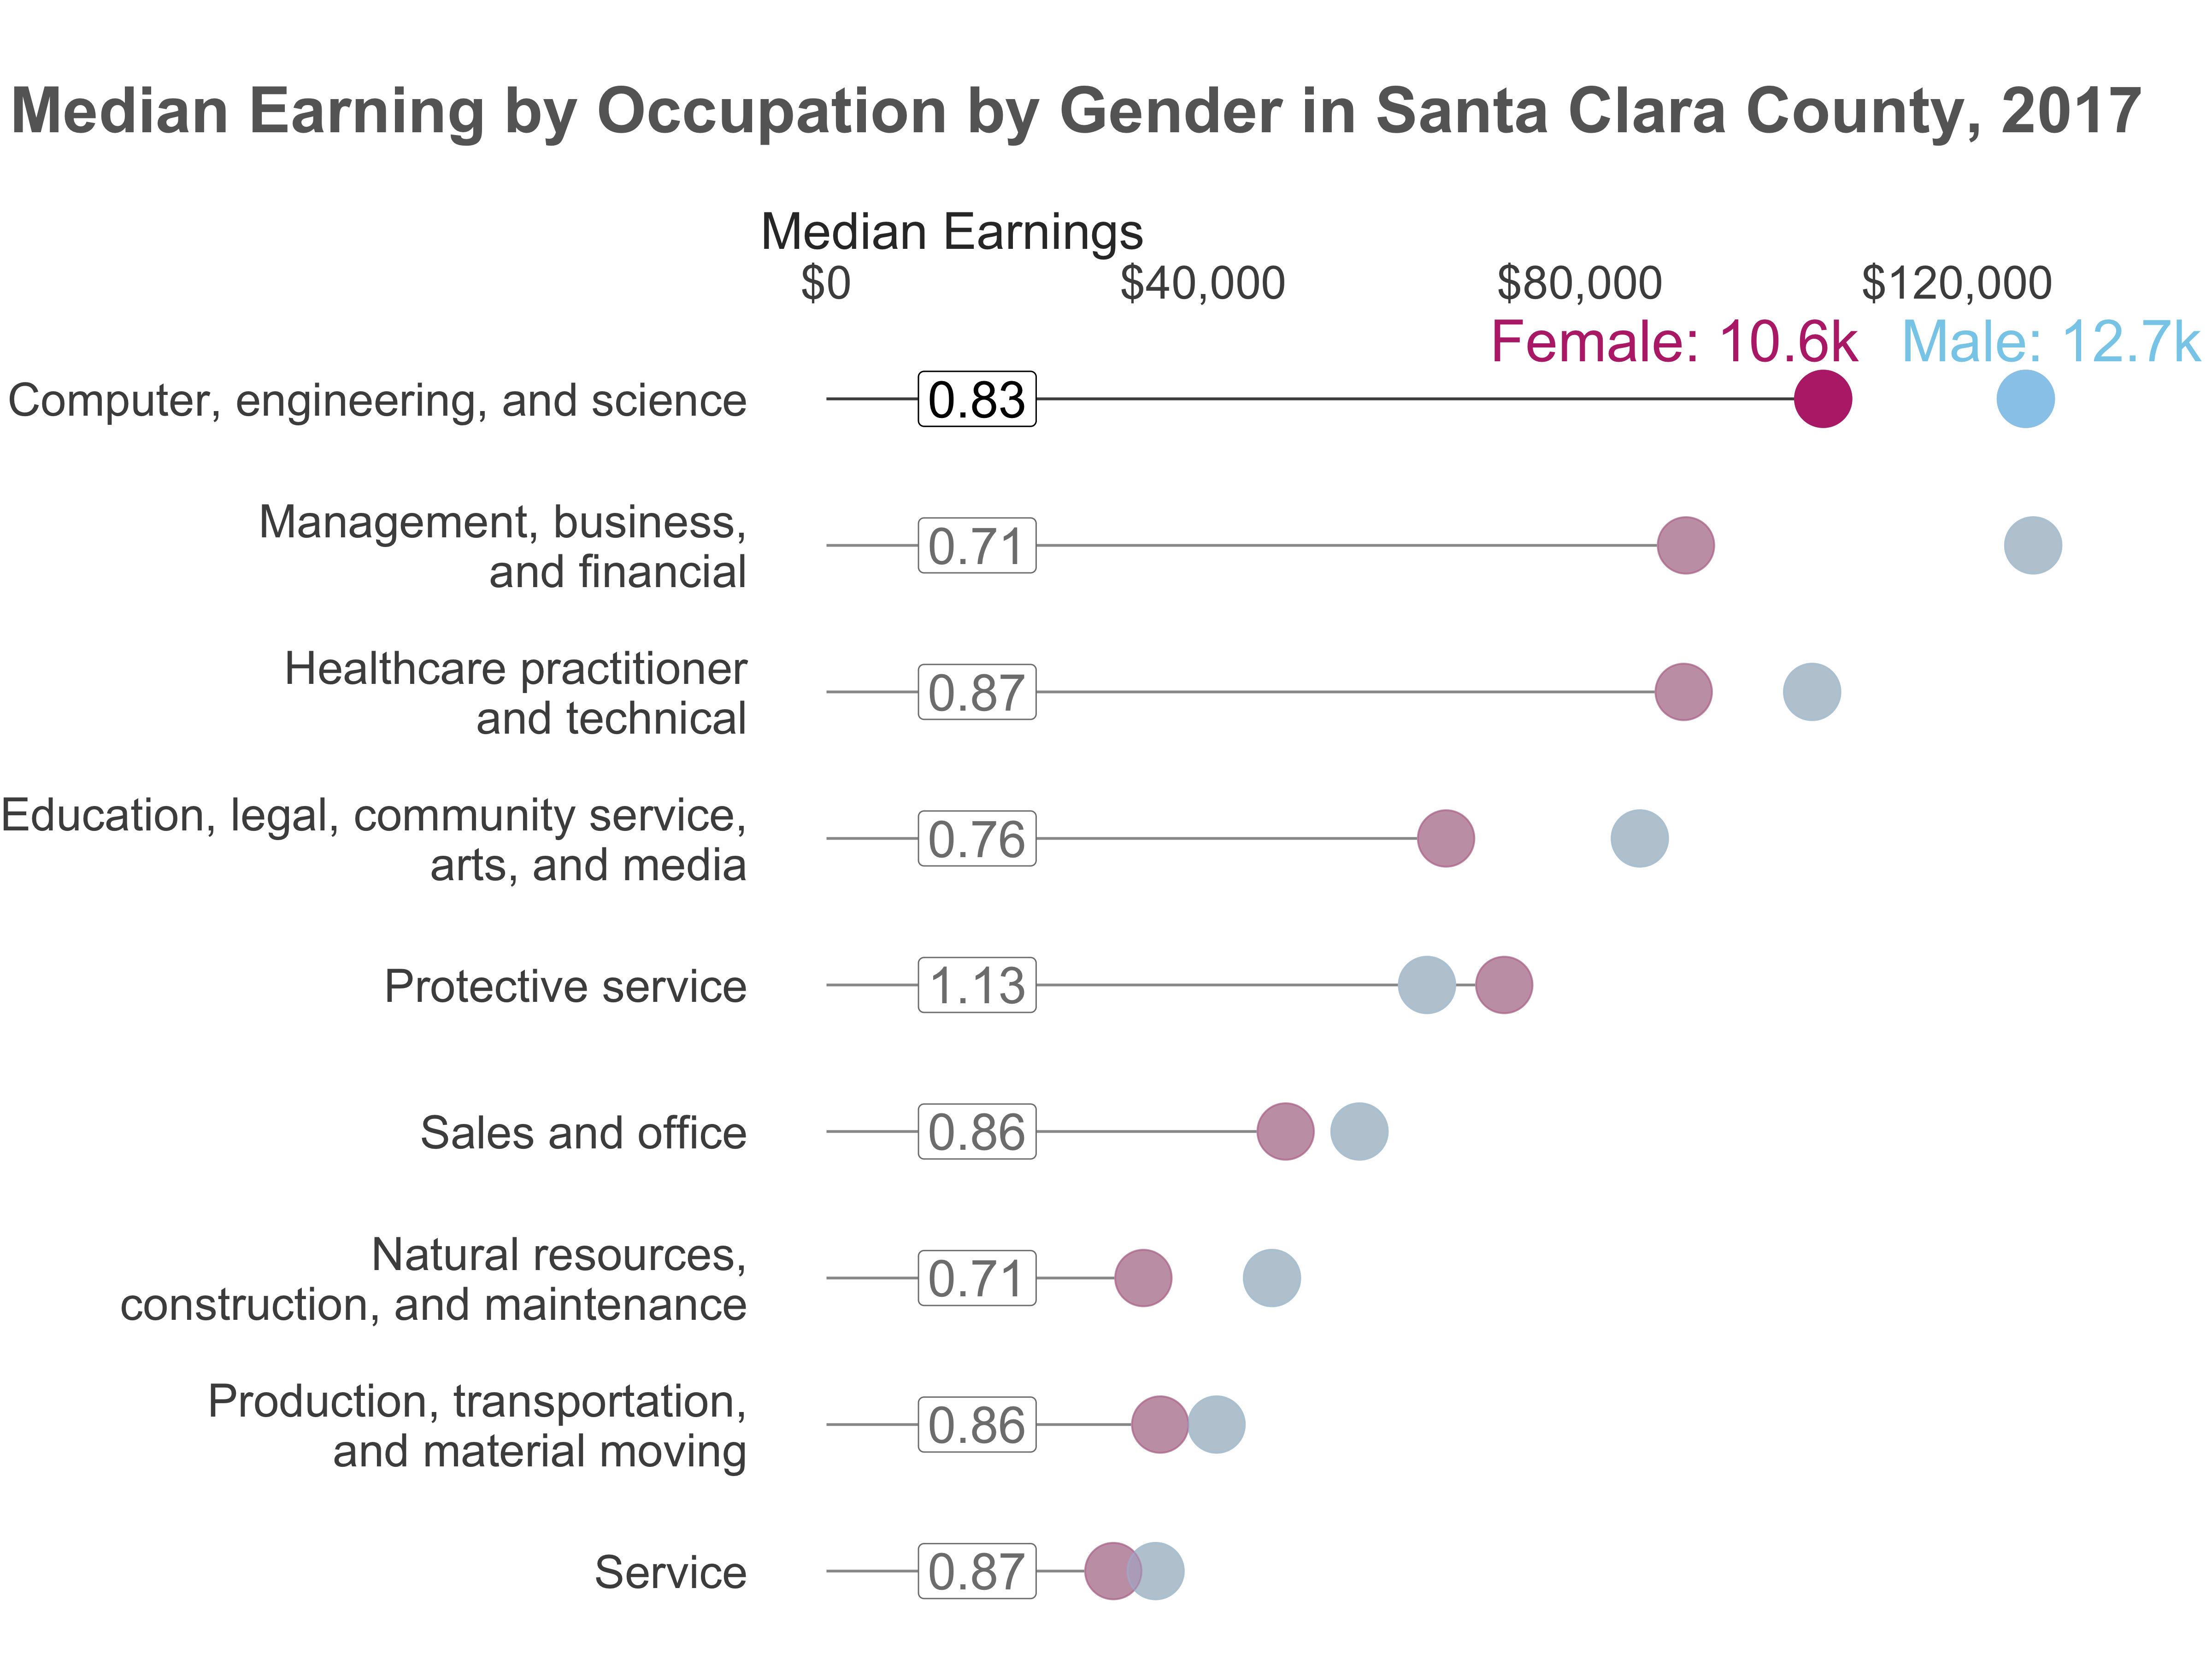

In [43]:
%%R -w 12 -h 9 --units in -r 400
ggplot() +
    geom_segment(aes(x = Occupation, xend = Occupation, y = MedianFemale, yend = 0), data = SantaC,color = 'grey60')+
    geom_segment(aes(x = Occupation, xend = Occupation, y = MedianFemale, yend = 0), data = SantaC_tech,color = 'grey30')+
   
    geom_point(aes(x = Occupation, y = MedianFemale),data = SantaC, color = 'grey80', size = 10)+
    geom_point(aes(x = Occupation, y = MedianMale),data = SantaC, color = 'grey80', size = 10)+
    
    geom_point(aes(x = Occupation, y = MedianFemale),data = SantaC, color = '#B92F77', size = 10, alpha=0.3)+
    geom_point(aes(x = Occupation, y = MedianMale),data = SantaC, color = '#97CBEC', size = 10, alpha=0.3)+
    
    
    geom_point(aes(x = Occupation, y = MedianFemale),data = SantaC_tech, color = '#B92F77', size = 10)+
    geom_point(aes(x = Occupation, y = MedianMale),data = SantaC_tech, color = '#97CBEC', size = 10)+
    
    annotate(geom = 'text', x = 9.4, y = 90000, label = 'Female: 10.6k', color = '#B92F77', size = 8)+
    annotate(geom = 'text', x = 9.4, y = 130000, label = 'Male: 12.7k', color = 'skyblue', size = 8)+
    
    geom_label(aes(x = Occupation, y = 16000, label = Ratio), data = SantaC, size = 7, color = 'grey50')+
    geom_label(aes(x = Occupation, y = 16000, label = Ratio), data = SantaC_tech, size = 7)+
    coord_flip()+
    ggtitle('Median Earning by Occupation by Gender in Santa Clara County, 2017')+
    scale_y_continuous(limits = c(0,140000),label = dollar, breaks = seq(0,140000, by = 40000),
                      position = 'right')+
    #geom_hline(yintercept=0.72, linetype = 'dashed', color = 'grey30')+
    #scale_color_manual(values = c('skyblue2', 'blue3'))+
    ylab('\nMedian Earnings')+
    theme_minimal()+
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.y = element_blank(),
          axis.title.x = element_text(size = 20, color = 'grey20',hjust=0),
          axis.text = element_text(size = 18),
          legend.position = 'none',
          plot.margin = unit(c(1,0,0,0),'cm'),
          plot.title = element_text(size =25,face="bold", color = 'grey40', vjust = 0, hjust = 1.1))
#ggsave('figure5.png',units = 'in', width = 12, height = 9)

<font size=4>__table 3 sex_occupation_fulltime__</font>

In [26]:
df3 = pd.read_excel('occupation_sex_fulltime.xls',header = [0,1,2],thousands=',')
df3 = df3.dropna(axis=1)
t = 'Subject', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'
df3[t] = df3[t].astype('category')
df3 = df3.set_index(t)

In [27]:
#define a function to seperate dataframe for each region
def extractNo(location,df):
    l = []
    for i in df:
        if ((i[0] == location)&(i[2] == 'Estimate')):
            l.append(i)
        if (type(df[i][0]) == str):
            if('%' in df[i][0]):
                df[i] = df[i].str.rstrip('%').astype('float') / 100.0
    df = df[l].reset_index()
    df.columns = ['Occupation','Total','Male','MalePct','Female','FemalePct']
    df['Region'] = location.split(',')[0]
    df = df.loc[(df.Occupation.str[-1]==':')].reset_index(drop=True).drop(0).reset_index(drop=True)
    return(df)

In [29]:
scNo = extractNo('Santa Clara County, California',df3)
scNo.Occupation = scNo.Occupation.str.replace('occupations:','').str.strip()
sc.Occupation = sc.Occupation.str.replace('occupations:','').str.strip()
sc_new = pd.merge(scNo, sc, on = 'Occupation', how = 'inner')

In [30]:
#select aggregated occupations and region of Santa Clara County
sc_new = sc_new.sort_values('MedianTotal', ascending = True).reset_index(drop=True)
sc_new.Occupation = ['Service',
 'Production, transportation,\nand material moving',
 'Natural resources,\nconstruction, and maintenance',
 'Sales and office',
 'Protective service',
 'Education, legal, community service,\narts, and media',
 'Healthcare practitioner\nand technical',
 'Management, business,\nand financial',
 'Computer, engineering, and science']
sc_new.Occupation = pd.Categorical(sc_new.Occupation,categories=list(sc_new.Occupation.unique()), ordered = True)
sc_new['label'] = sc_new.FemalePct.round(2)*100
sc_new['label'] = sc_new.label.astype('int').astype('str')+'%'


In [31]:
sc_new_high = sc_new.iloc[[7,8]]
sc_new_low = sc_new.iloc[[0,1,2,3,4,5,6]]

<font size=4>__figure 6: Gender population vs Occupation in Santa Clara__</font>

In [32]:
%R -i sc_new_low
%R -i sc_new_high
%R -i sc_new

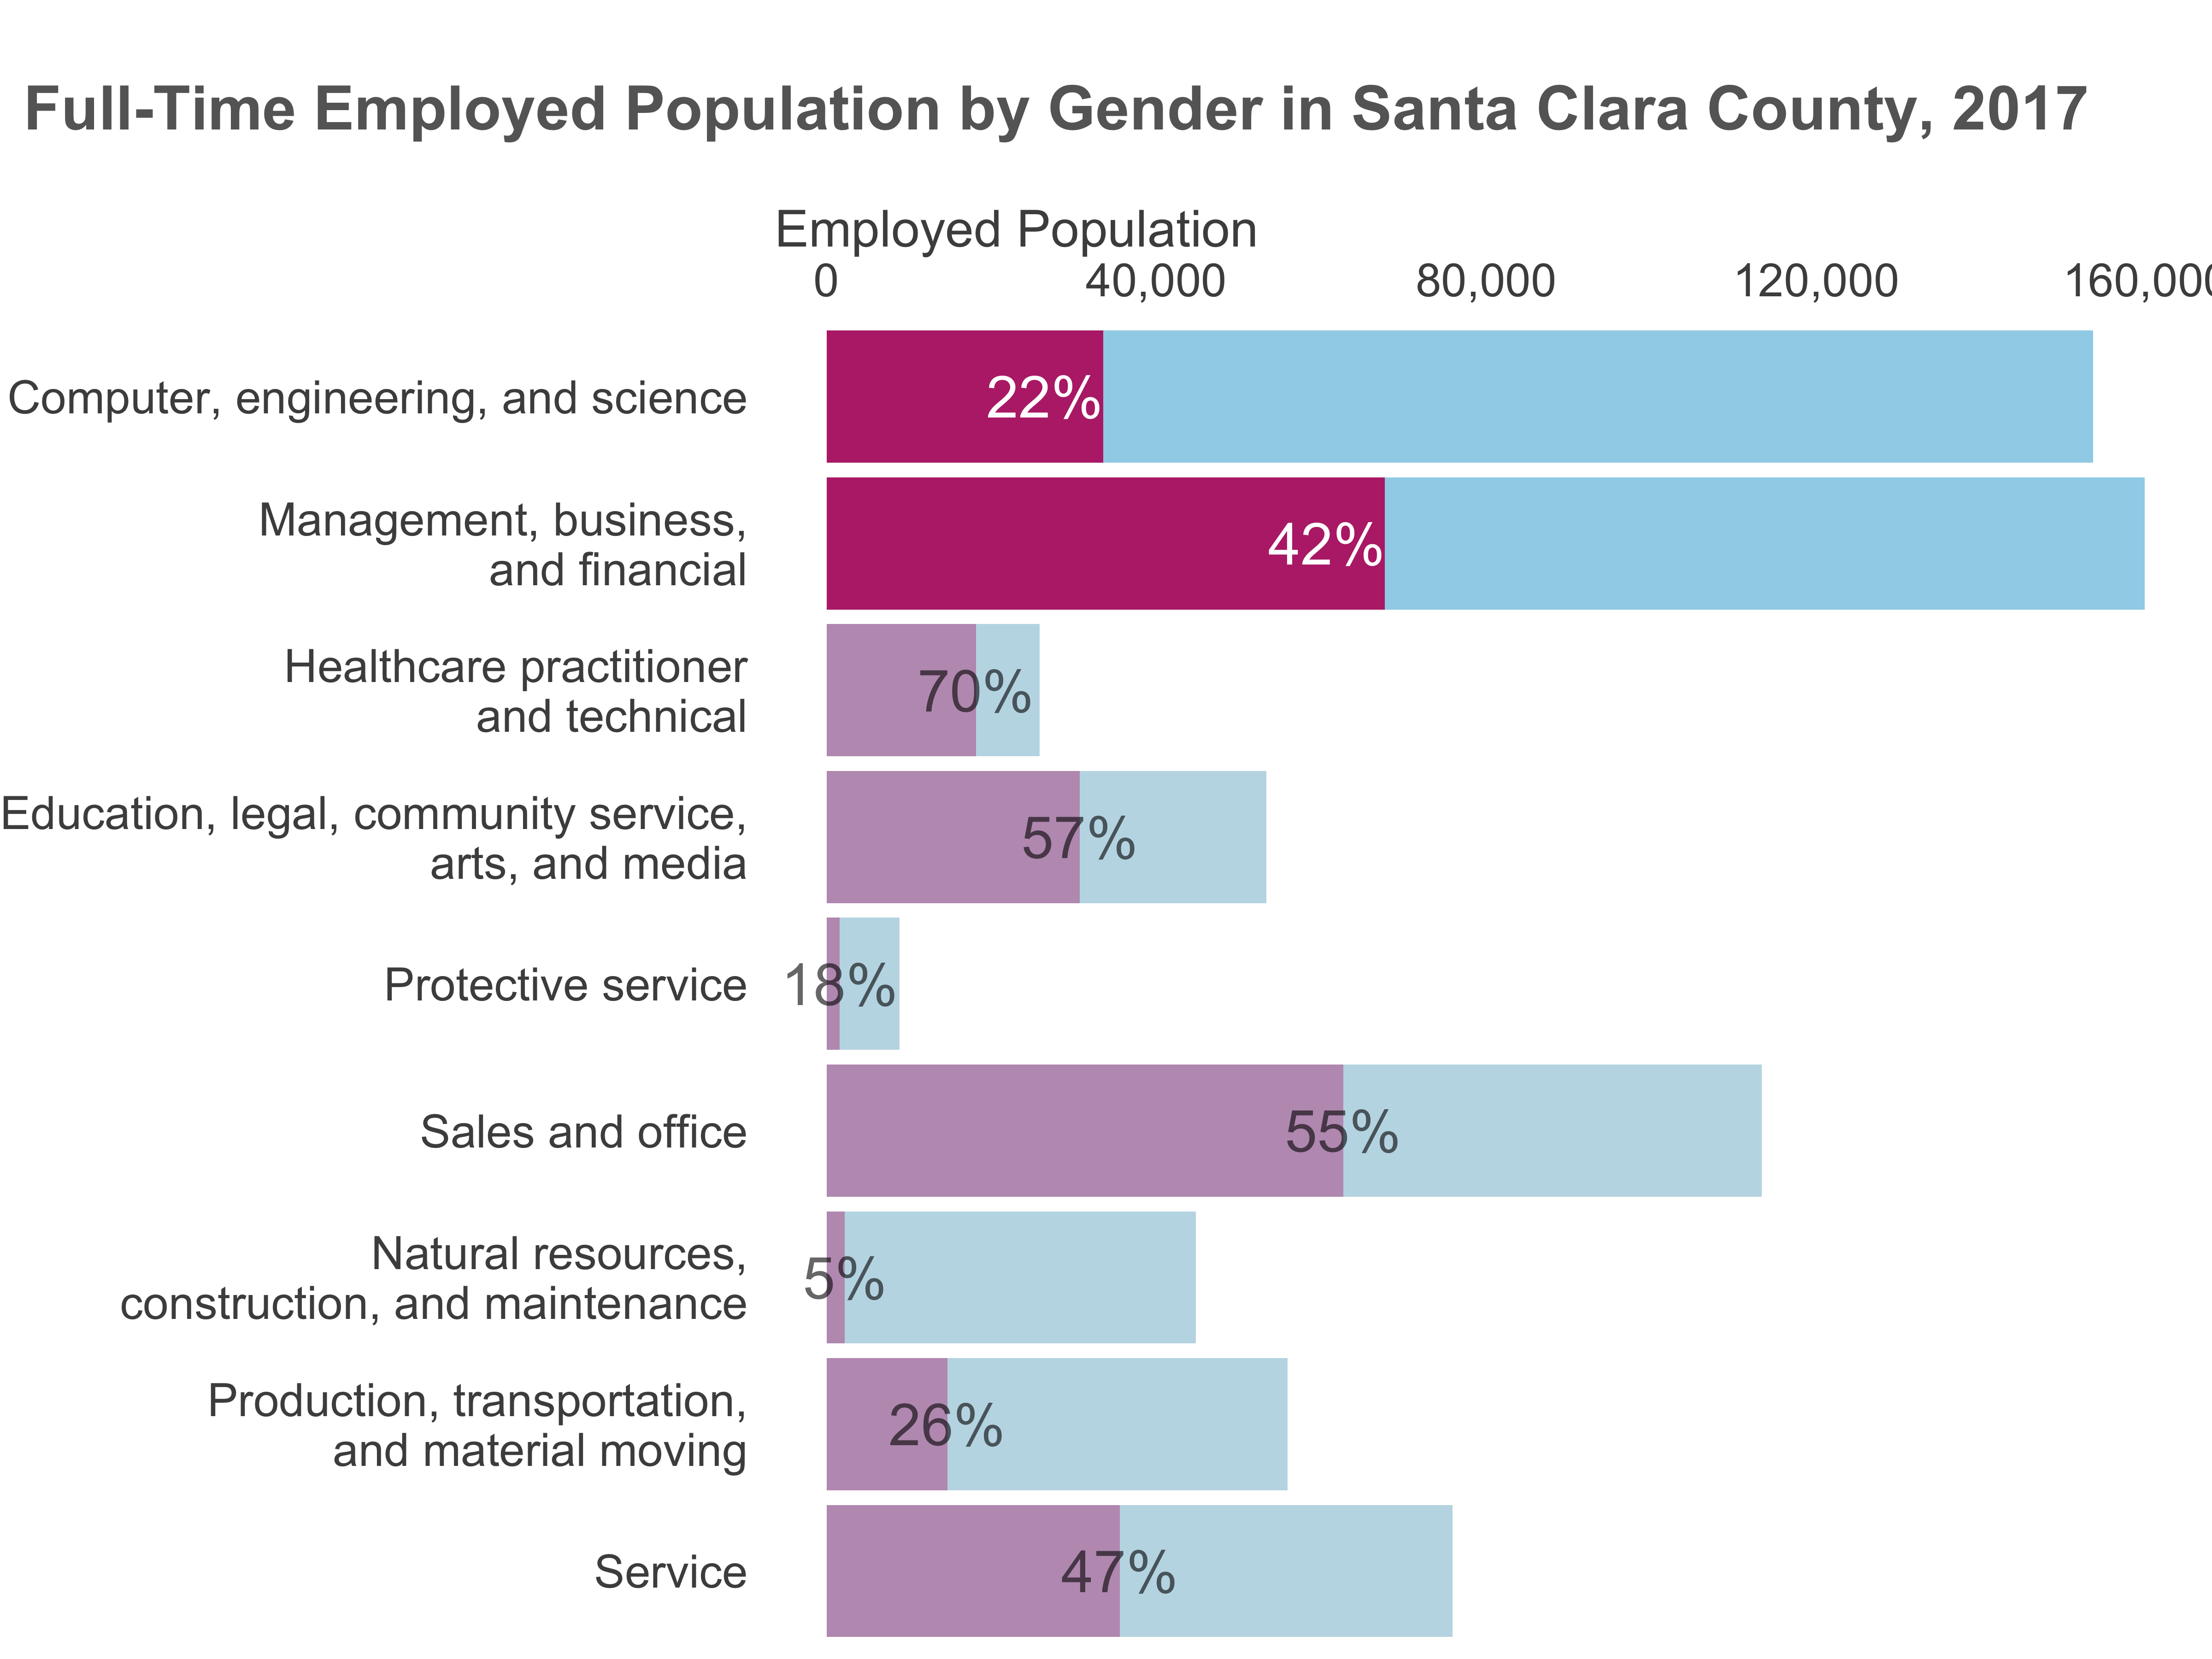

In [44]:
%%R -w 12 -h 9 --units in -r 400
ggplot() +
    geom_bar(aes(x = Occupation, y = Total), data = sc_new, stat = 'identity',fill = 'grey90')+
    geom_bar(aes(x = Occupation, y = Female), data = sc_new, stat = 'identity',fill = 'grey90')+
    geom_bar(aes(x = Occupation, y = Total), data = sc_new, stat = 'identity',fill = 'skyblue',alpha =0.4)+
    geom_bar(aes(x = Occupation, y = Female), data = sc_new, stat = 'identity',fill = '#B92F77',alpha =0.4)+
    geom_text(aes(x = Occupation, y = Female, label = label), data = sc_new_low, size = 8,alpha =0.6)+

    geom_bar(aes(x = Occupation, y = Total), data = sc_new_high, stat = 'identity',fill = 'skyblue',alpha =0.6)+
    geom_bar(aes(x = Occupation, y = Female), data = sc_new_high, stat = 'identity',fill = '#B92F77')+
    geom_text(aes(x = Occupation, y = Female, label = label), data = sc_new_high, size = 8, color = 'white',hjust = 1)+
    coord_flip()+
    ggtitle('Full-Time Employed Population by Gender in Santa Clara County, 2017')+
    scale_y_continuous(limits = c(0,160000), label = comma, breaks = seq(0,160000,by = 40000), position = 'right')+
    ylab('\n Employed Population')+
    theme_minimal()+
    theme(panel.grid = element_blank(),
          panel.grid.minor = element_blank(),
          axis.title.y = element_blank(),
          axis.title.x = element_text(size = 20, color = 'grey30',hjust=0),
          axis.text = element_text(size = 18),
          legend.position = 'none',
          plot.margin = unit(c(1,0,0,0),'cm'),
          plot.title = element_text(size =24,face="bold", color = 'grey40', vjust = 0, hjust = 1.2))
#ggsave('figure6.png',units = 'in', width = 12, height = 9)

<font size=4>__table 4 earning_sex_occupation_with_parttime__</font>

In [34]:
df4 = pd.read_excel('earning_sex_occupation.xls',header = [0,1,2],thousands=',')
df4 = df4.dropna(axis=1)
t = 'Subject', 'Unnamed: 0_level_1', 'Unnamed: 0_level_2'
df4[t] = df4[t].astype('category')
df4 = df4.set_index(t)

In [35]:
#select data for Santa Clara County from table 4
us4 = extractdf('United States',df4)
ca4 = extractdf('California',df4)
sf4 = extractdf('San Francisco County, California',df4)
sm4 = extractdf('San Mateo County, California',df4)
sc4 = extractdf('Santa Clara County, California',df4)
table4 = pd.concat([us4,ca4,sf4,sm4,sc4],axis = 0).reset_index(drop=True)
table4.Occupation = table4.Occupation.astype('str')

total4 = table4.loc[(table4.Occupation=='Civilian employed population 16 years and over with earnings')].sort_values(['Occupation','Ratio'],ascending = [True,False]).reset_index(drop=True)
Ratio4 = total4.loc[total.Region != 'United States'].reset_index(drop=True)
Ratio4['flag'] = 'below'
Ratio4.loc[Ratio4.Ratio>0.8,'flag'] = 'above'
Ratio4.Region = pd.Categorical(Ratio4.Region,categories=list(Ratio4.Region.unique()), ordered = True)
total4['label'] = 'All\nemployed population'
total['label'] ='Full-time\nemployed population'
parttime = pd.concat([total4,total])
parttime['color'] = '0'
parttime.loc[parttime.Region == 'Santa Clara County', 'color'] = '1'
parttime = parttime.sort_values('label',ascending = False)
parttime.label = pd.Categorical(parttime.label,categories=list(parttime.label.unique()), ordered = True)

<font size=4>__figure 7: Gender population vs Occupation in Santa Clara with part time__</font>

In [36]:
%R -i parttime

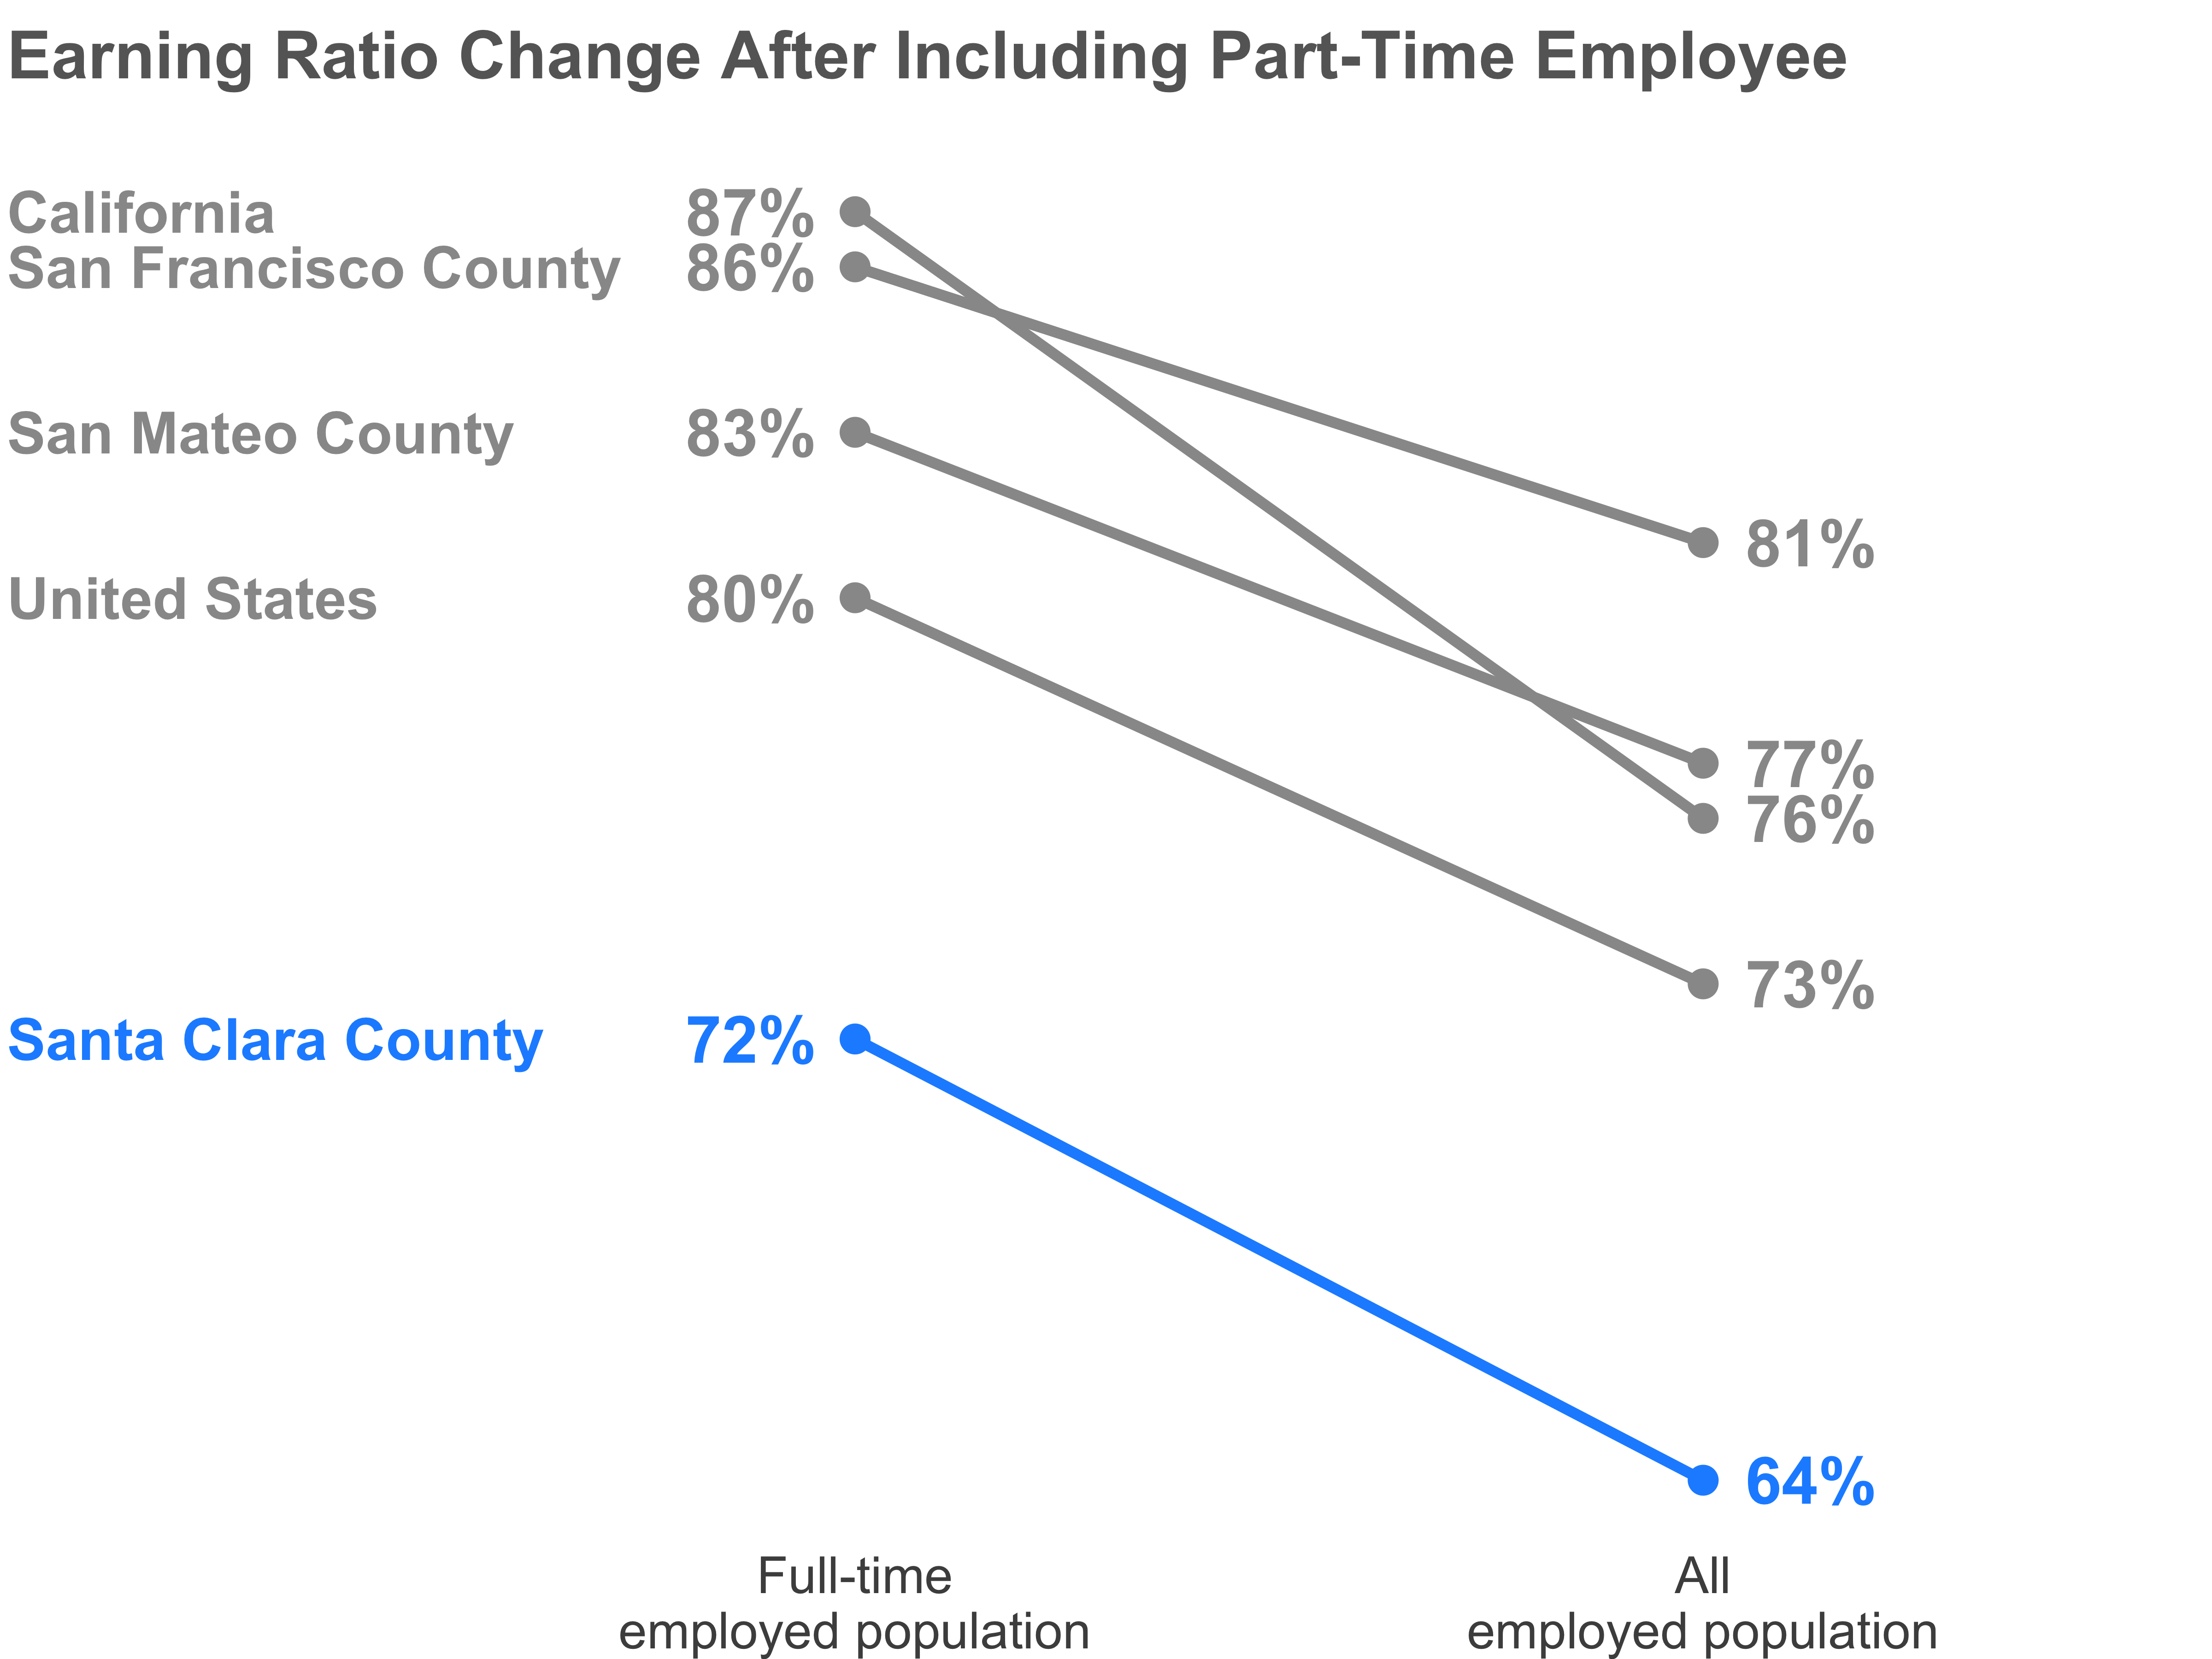

In [48]:
%%R -w 12 -h 9 --units in -r 400
ggplot(data = parttime,aes(x = label, y = Ratio, group = Region)) +
    geom_line(aes(color = color), size = 2)+
    geom_point(aes(color = color),size = 5)+
    geom_text(data = subset(parttime,label == 'Full-time\nemployed population'), aes(color = color,
                                                               label = paste0(Ratio*100, "%")),
                  hjust = "left", 
                  fontface = "bold", 
                  size = 9, 
                  nudge_x = -.2)+
    geom_text(data = subset(parttime,label == 'All\nemployed population'), aes(color = color,
                                                               label = paste0(Ratio*100, "%")),
                  hjust = "left", 
                  fontface = "bold", 
                  size = 9, 
                  nudge_x = .05)+
    geom_text(data = subset(parttime,label == 'Full-time\nemployed population'), aes(color = color,
                                                               label = Region),
                  hjust = "left", 
                  fontface = "bold", 
                  size = 8, 
                  nudge_x = -1)+
    scale_color_manual(values = c('grey60','dodgerblue'))+
    ggtitle('Earning Ratio Change After Including Part-Time Employee')+
    theme_minimal()+
    theme(panel.grid = element_blank(),
          axis.title = element_blank(),
          axis.text.y = element_blank(),
          axis.text = element_text(size = 20),
          legend.position = 'none',
          plot.margin = unit(c(1,0,0,0),'cm'),
          plot.title = element_text(size =26,face="bold", color = 'grey40', vjust = 4))
#ggsave('figure7.png',units = 'in', width = 12, height = 9)